### 1. Set-Up and Data Loading <a class="anchor" id="1-set-up-and-data-loading"></a>

This jupyter notebook contains the code that was used to support the analysis that is in the report as well as to create the figures. There are figures in the code that might be useful in a later phase of the project so our group decided to keep those, as well as the code.

To help the reading of the code, we decided to label the figures in the code accordingly to the label that those have in the report.

In [1]:
import numpy as np #to efficiently compute functions
import pandas as pd #to work with data frames
pd.set_option('display.max_columns',100) #to display 100 columns
import matplotlib.pyplot as plt
from math import ceil
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
sns.set(style="whitegrid")
import zipfile #to open zipfile
pd.set_option('display.max_columns', 35) #to display 35 columns
pd.set_option('display.max_rows', 100) #to display 100 rows
from ydata_profiling import ProfileReport
import os

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency

In [2]:
# Import the dataset
df = pd.read_csv("DM2425_ABCDEats_DATASET.csv") 

In [3]:
copy_df = df.copy() #copy the dataframe to avoid modifying the original dataframe

In [4]:
copy_df.shape

(31888, 56)

### 2. Data Understanding and Exploration <a class="anchor" id="dataunderstanding"></a>

* Examine missing values
* Numerical and categorical data split

#### Examine missing values

In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values = missing_values_table(copy_df)

Your selected dataframe has 56 columns.
There are 3 columns that have missing values.


In [6]:
missing_values.head(3)

Missing Values  % of Total Values
HR_0                    1165                3.7
customer_age             727                2.3
first_order              106                0.3

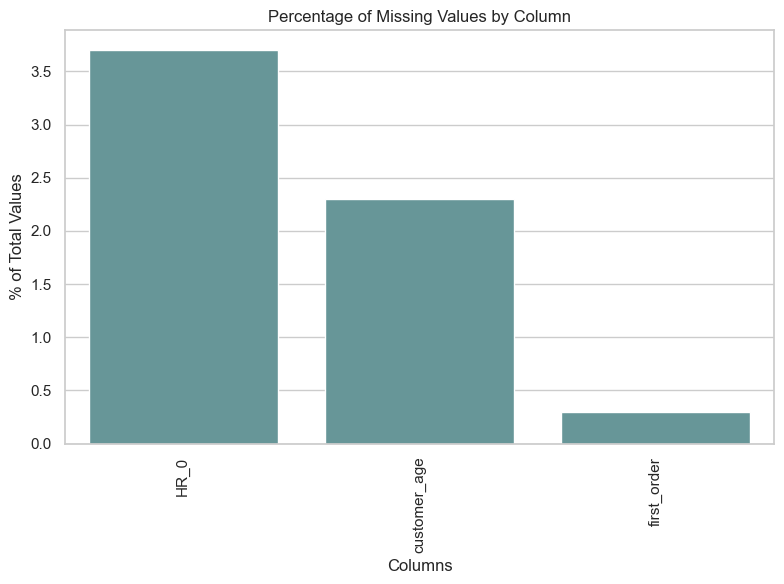

In [7]:
# Function to plot missing values by column
def plot_missing_values(mis_val_table):
    plt.figure(figsize=(8, 6))
    
    # Create a bar plot for the percentage of missing values
    sns.barplot(x=mis_val_table.index, 
                y=mis_val_table['% of Total Values'] , color = 'cadetblue')
    
    # Rotate the x labels for better readability
    plt.xticks(rotation=90)
    
    # Set plot labels and title
    plt.title('Percentage of Missing Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('% of Total Values')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the missing values
plot_missing_values(missing_values)

Figure 1 - Percentage of missing values by column <a class="anchor" id="figure1"></a>

#### Numerical and categorical features split

In [8]:
# Separate from copy_df numerical and categorical columns
numerical_cols = copy_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = copy_df.select_dtypes('object').columns.tolist()

print("Numerical: " + str(numerical_cols), "\n", "Categorical: " + str(categorical_cols))

Numerical: ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'] 
 Categorical: ['customer_id', 'customer_region', 'last_promo', 'payment_method']


### Anomalies detection on numerical features

In [9]:
def numerical_describe(df, num_col):
    # Check if the column in the DataFrame is numerical
    if np.issubdtype(df[num_col].dtype, np.number):
        return df[num_col].describe()
    else:
        return None

# Iterate over the list of numerical columns
for col in numerical_cols:
    print(f"Description for column {col}:\n")
    
    print(numerical_describe(copy_df, col))


Description for column customer_age:

count    31161.000000
mean        27.506499
std          7.160898
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64
Description for column vendor_count:

count    31888.000000
mean         3.102609
std          2.771587
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         41.000000
Name: vendor_count, dtype: float64
Description for column product_count:

count    31888.000000
mean         5.668245
std          6.957287
min          0.000000
25%          2.000000
50%          3.000000
75%          7.000000
max        269.000000
Name: product_count, dtype: float64
Description for column is_chain:

count    31888.000000
mean         2.818866
std          3.977529
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         83.000000
Name: is_chain, dtype: float64
Descriptio

##### Anomaly detection for DOW_columns and HR Columns:

- According to the metadata we know that the sum of the orders in DOW has to be equal to the sum of the orders placed in HR columns, because our dataset tracks unique orders placed, so if a customer bought 1 time on Monday and another time on Tuesday, it can't be the case where we have 3 orders registered for instance in HR_1 , HR_2 and HR_3 ; because as stated before, each order is unique and registered in the corresponding DOW as well as the HR column 

In [10]:
# For column HR_0 , there are 30723 null values and 1165 NaN values

copy_df['HR_0'].value_counts(dropna=False)

# It's plausible to assume that the app must be offline for maintannce or some other reason, so we can replace the missing values with 0

HR_0
0.0    30723
NaN     1165
Name: count, dtype: int64

In [11]:
# Flag for sum of orders placed in all DOW's and all hours

hour_columns = [f'HR_{i}' for i in range(24)]

# Summing the orders placed in each hour for each customer
copy_df['hourly_sum'] = copy_df[hour_columns].sum(axis=1) # axis = 1 to sum horizontally

day_columns = [f'DOW_{i}' for i in range(7)]

copy_df['daily_sum'] = copy_df[day_columns].sum(axis=1)

# Flag rows where the sum of orders by day is different from the sum by hour
copy_df['flag_DOW_HR'] = copy_df['daily_sum'] != copy_df['hourly_sum']

# View the flagged rows
flagged_rows = copy_df[copy_df['flag_DOW_HR']]

print(len(flagged_rows))

# flagged_rows.iloc[:,25:60].head(1)
# As an example we can see that customer 34 has 2 orders placed in DOW_6 but then it only has 1 order placed at HR_11 which represents an inconsistency
# in the dataset 


1165


##### Anomaly detection for first_order and last_order


In [12]:
# Getting the value counts and converting to a DataFrame
value_counts_df = copy_df.loc[:, ['first_order', 'last_order']].value_counts(dropna=False).reset_index()

# Renaming the columns for clarity
value_counts_df.columns = ['first_order', 'last_order', 'count']

# Display the resulting DataFrame
value_counts_df.head(10)


first_order  last_order  count
0         83.0          83    136
1         69.0          69    135
2         76.0          76    132
3          0.0          89    131
4         84.0          84    131
5         34.0          34    130
6         27.0          27    128
7         89.0          89    121
8         14.0          14    113
9         70.0          70    111

In [13]:
# Check for missing values in 'first_order' and 'last_order'
missing_first_order = copy_df['first_order'].isna()
missing_last_order = copy_df['last_order'].isna()

# Rows with missing values
anomalies_missing_folo = copy_df[missing_first_order | missing_last_order]

print(len(anomalies_missing_folo)) # 106 rows have missing values in 'first_order' or 'last_order' we have to adress them later

106


In [14]:
# Verify logical consistency which is first_order > last_order

# Find rows where 'first_order' > 'last_order'
anomalies_order_folo = copy_df[copy_df['first_order'] > copy_df['last_order']]

# Display the anomalies
print(anomalies_order_folo[['customer_id', 'first_order', 'last_order']].head(10))

print("\n")

print(len(anomalies_order_folo)) # 0 rows have 'first_order' > 'last_order'

Empty DataFrame
Columns: [customer_id, first_order, last_order]
Index: []


0


In [15]:
# Find negative values in 'first_order' and 'last_order'
anomalies_negative_folo = copy_df[(copy_df['first_order'] < 0) | (copy_df['last_order'] < 0)]

# Display the anomalies
print(anomalies_negative_folo[['customer_id', 'first_order', 'last_order']].head(10))


Empty DataFrame
Columns: [customer_id, first_order, last_order]
Index: []


In [16]:
# Assuming the dataset covers 0 to 90 days
anomalies_range_folo = copy_df[(copy_df['first_order'] > 90) | (copy_df['last_order'] > 90)]

# Display the anomalies
print(anomalies_range_folo[['customer_id', 'first_order', 'last_order']].head(10))


Empty DataFrame
Columns: [customer_id, first_order, last_order]
Index: []


In [17]:
# Combine all anomalies into one DataFrame
anomalies_folo = pd.concat([
    anomalies_missing_folo,
    anomalies_order_folo,
    anomalies_negative_folo,
    anomalies_range_folo,
]).drop_duplicates()

# Display the combined anomalies
print(anomalies_folo[['customer_id', 'first_order', 'last_order']].head(10))

print(len(anomalies_folo[['customer_id', 'first_order', 'last_order']]))

anomalies_folo.index


      customer_id  first_order  last_order
31782  0366fbb035          NaN           0
31783  039d7c8a20          NaN           0
31784  04c9d25c93          NaN           0
31785  09118ae9e7          NaN           0
31786  0d1f298bbd          NaN           0
31787  0e61c6c970          NaN           0
31788  12faabe829          NaN           0
31789  14dd83cc53          NaN           0
31790  1529108175          NaN           0
31791  167a9522d7          NaN           0
106


Index([31782, 31783, 31784, 31785, 31786, 31787, 31788, 31789, 31790, 31791,
       ...
       31878, 31879, 31880, 31881, 31882, 31883, 31884, 31885, 31886, 31887],
      dtype='int64', length=106)

Anomalies detection in numerical variables


In [18]:
def anomaly_detection_numerical(df,column):
    # See if the variable is negative (alll values should be positive)
    if df[column].min() < 0:
        print(f"Negative values found in {column}")
    else:
        print(f"No negative values found in {column}")
        print("\n")
    # See if the variable has only numerical values:
    if df[column].dtype == 'object':
        print(f"Non-numerical values found in {column}")
    else:
        print(f"No non-numerical values found in {column}")
        print("\n")
    # See if the variable has missing values:
    if df[column].isna().sum() > 0:
        print(f"Missing values found in {column}")
    else:
        print(f"No missing values found in {column}")
        print("\n")
    # See if the variable has duplicated values:
    if df[column].duplicated().sum() > 0:
        print(f"Duplicated values found in {column}")
    else:
        print(f"No duplicated values found in {column}")

# Iterate over the list of numerical columns
for var in numerical_cols:
    anomaly_detection_numerical(copy_df, var)


No negative values found in customer_age


No non-numerical values found in customer_age


Missing values found in customer_age
Duplicated values found in customer_age
No negative values found in vendor_count


No non-numerical values found in vendor_count


No missing values found in vendor_count


Duplicated values found in vendor_count
No negative values found in product_count


No non-numerical values found in product_count


No missing values found in product_count


Duplicated values found in product_count
No negative values found in is_chain


No non-numerical values found in is_chain


No missing values found in is_chain


Duplicated values found in is_chain
No negative values found in first_order


No non-numerical values found in first_order


Missing values found in first_order
Duplicated values found in first_order
No negative values found in last_order


No non-numerical values found in last_order


No missing values found in last_order


Duplicated values found in last_or

#### From the anomaly detection: 

Duplicated values found in product_count

Duplicated values found in is_chain

Missing values found in first_order

Duplicated values found in first_order

Duplicated values found in last_order

Duplicated values found in: [CUI_American, CUI_Asian, CUI_Beverages, CUI_Cafe, CUI_Chicken Dishes, CUI_Chinese, CUI_Desserts]


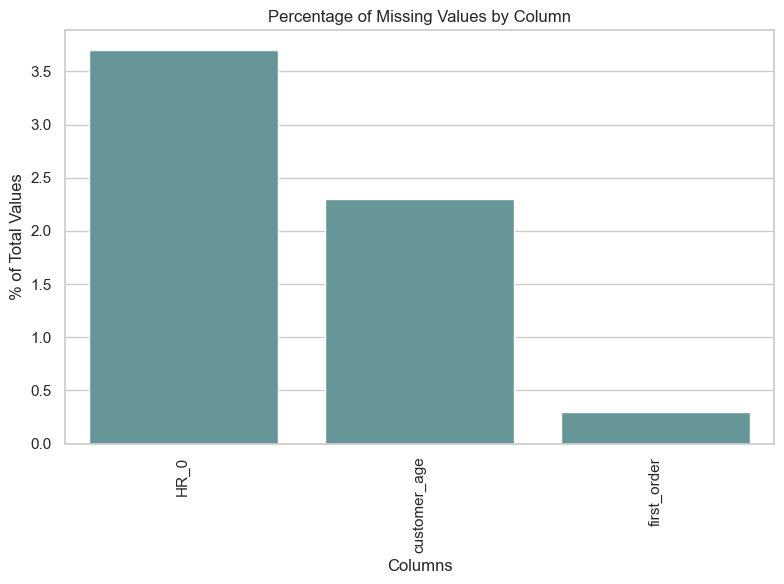

We already had seen that first_order and the other 2 columns had missing values, so nothing suprising here.

## Dataset copy to perform the changes and do the final visualization

In [19]:
# Create a copy of copy_df to perform the removal of the flagged rows and some other cleaning operations
removal_df = copy_df.copy()

# Remove duplicate rows
removal_df.drop_duplicates(inplace=True) # drop duplicates

# Remove the flagged rows
removal_df = removal_df[~removal_df['flag_DOW_HR']]

len(removal_df) # We went from 31888 rows to 30723 -12(duplicated rows) rows (we removed 4% of the data due to inconsistencies)


30711

In [20]:
removal_df = removal_df.drop(anomalies_folo.index, errors='ignore') # This ensures that even if some of the indexes don't exist in removal_df anymore, the drop() operation will proceed without raising an error

Distribution of the last_order days (right chart):

* Opposite trend: The distribution of last orders shows an increasing trend, peaking around Day 90. This suggests that many customers' most recent orders are placed toward the end of the observed period, meaning that a lot of customers remain active until the very last days of the dataset.

* Gradual increase: The activity picks up gradually, and there are consistently higher frequencies of orders between Days 60 and 90. This could indicate ongoing customer engagement, possibly due to retention strategies like promotions or loyalty programs keeping customers active.


* Peak on Day 90: A spike on Day 90 indicates that the dataset likely ends on this day, so many customers’ most recent (or last) orders happen at the end of the collection period.


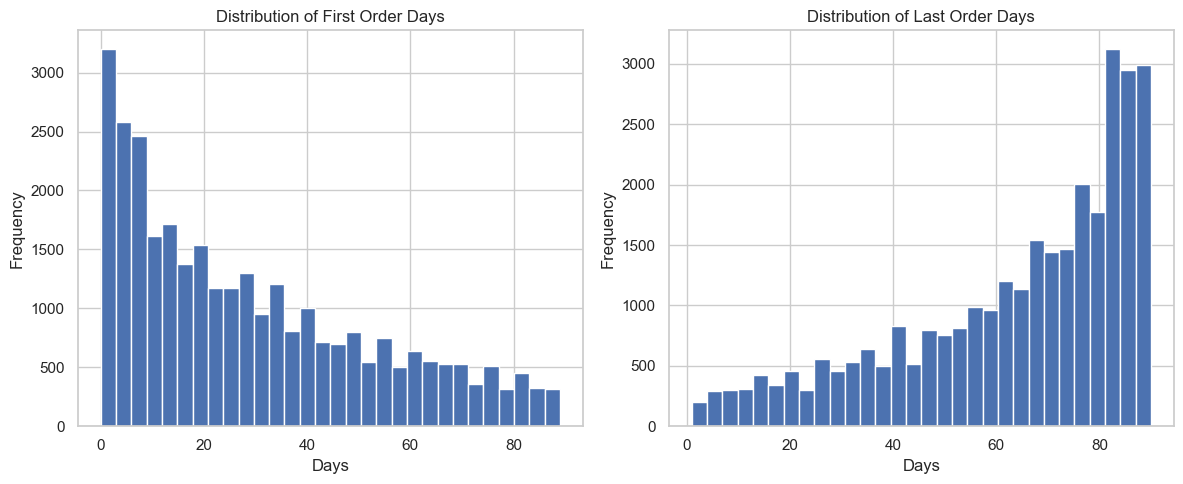

In [21]:
# Plot histograms for 'first_order' and 'last_order'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
removal_df['first_order'].hist(bins=30)
plt.title('Distribution of First Order Days')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
removal_df['last_order'].hist(bins=30)
plt.title('Distribution of Last Order Days')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
# Impute missing values in HR_0 with 0
removal_df['HR_0'].fillna(0, inplace=True)

# Optionally, you can impute missing values for other columns in a similar manner
# For example, you could impute missing customer_age with the median
removal_df['customer_age'].fillna(removal_df['customer_age'].median(), inplace=True)

# If you want to impute missing values in 'first_order' (assuming it's a numerical or date column)
# This is just an example, you can decide the method that best fits your data
removal_df['first_order'].fillna(removal_df['first_order'].median(), inplace=True)

# After handling missing values, check the DataFrame again to ensure all issues are resolved
print(removal_df.isna().sum())


customer_id                 0
customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1      

#### Now, let's do the visualization of the dataset after inconsistencies removal !! 

In [23]:
print(removal_df["customer_region"].describe())
print(removal_df["payment_method"].describe())
print(removal_df["last_promo"].describe())


count     30606
unique        9
top        4660
freq       9432
Name: customer_region, dtype: object
count     30606
unique        3
top        CARD
freq      19282
Name: payment_method, dtype: object
count     30606
unique        4
top           -
freq      16020
Name: last_promo, dtype: object


#### Visualization on categorical features <a class="anchor" id="visualizations"></a>

In [24]:
plot_categorical_cols = ["customer_region", "payment_method" , "last_promo"]

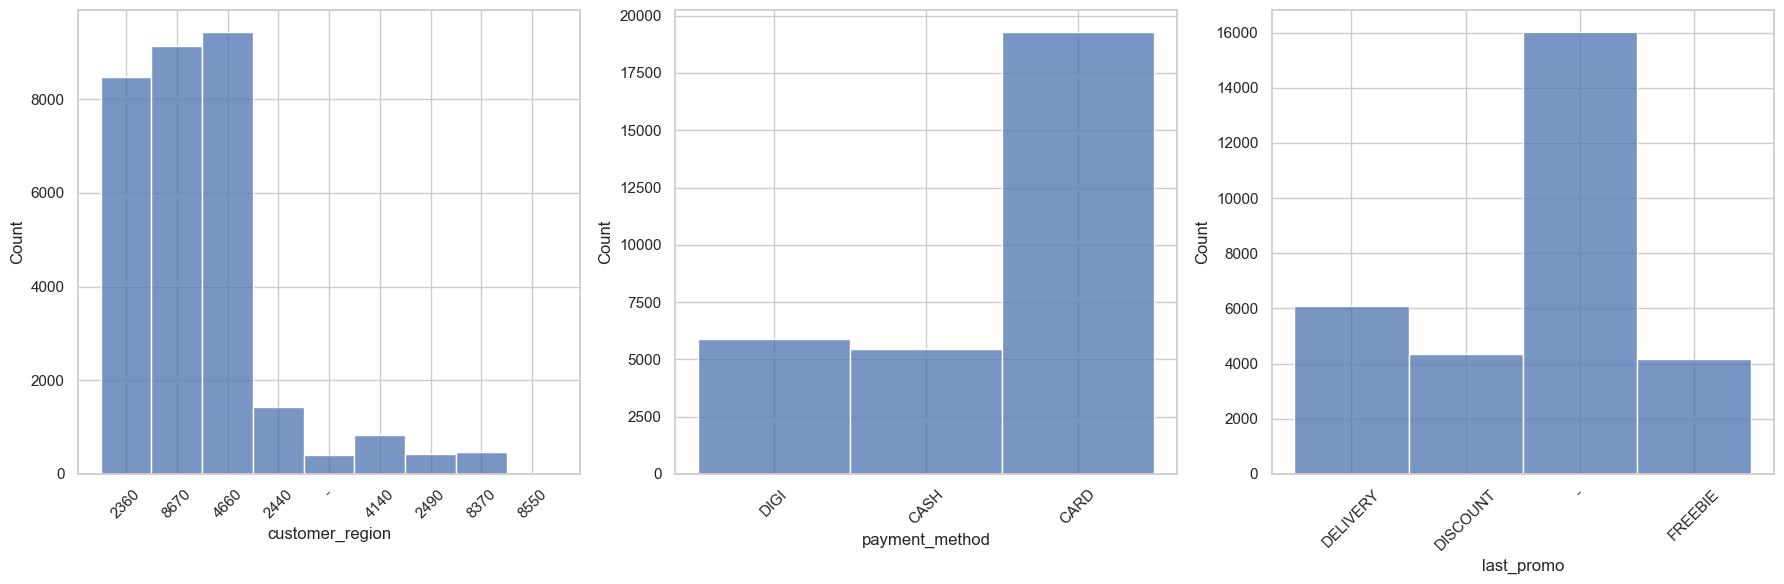

In [25]:
# Create subplots for numerical variable counts
fig, axes = plt.subplots(nrows=1, ncols=len(plot_categorical_cols), figsize=(18, 6))

# Loop through each categorical column and plot
for i, col in enumerate(plot_categorical_cols):
    sns.histplot(removal_df[col], bins=10, ax=axes[i], kde=False)  # Adjust bins as needed
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='customer_region', ylabel='Count'>

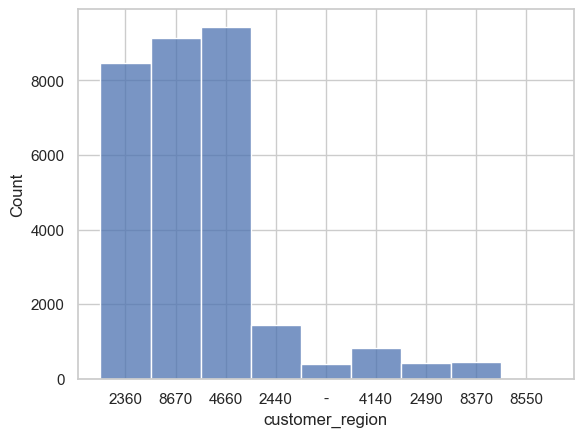

In [26]:
sns.histplot(removal_df['customer_region'], bins=10, kde=False) 

In [27]:
removal_df["customer_region"].value_counts()

customer_region
4660    9432
8670    9138
2360    8464
2440    1436
4140     829
8370     468
2490     423
-        404
8550      12
Name: count, dtype: int64

In [28]:
# from the visualization we can see that in removal_df there are still weird values for customer_region and last_promo 

# Check the unique values in 'customer_region'
removal_df['customer_region'].value_counts(dropna=False) # we have 404 "-" values which doesn't make sense either because the person didnt 
# provide the information or the data was not collected properly

# Check the unique values in 'last_promo'
removal_df['last_promo'].value_counts(dropna=False) # We have 16020 "-" values which could be like that because the person 
# didn't use any promo code or the data was not collected properly (we don't know the reason)



last_promo
-           16020
DELIVERY     6079
DISCOUNT     4332
FREEBIE      4175
Name: count, dtype: int64

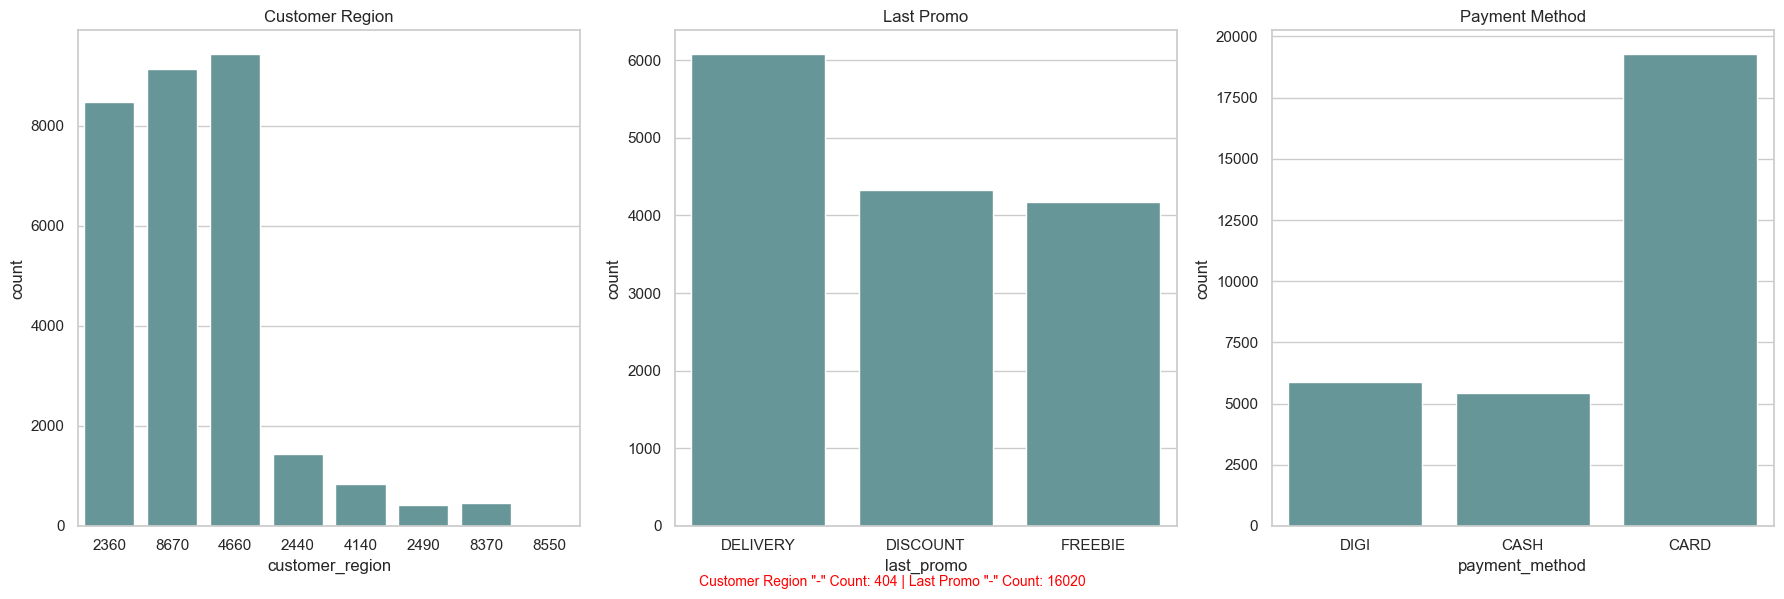

In [29]:
# Lets plot the variables without these weird values
# Count the "-" values
customer_region_dash_count = (removal_df['customer_region'] == "-").sum()
last_promo_dash_count = (removal_df['last_promo'] == "-").sum()

# Filter out the "-" values for customer_region and last_promo
filtered_df = removal_df[removal_df['customer_region'] != "-"]
filtered_df_promo = removal_df[removal_df['last_promo'] != "-"]

# Create the plot with 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot customer_region without "-" values
sns.countplot(x='customer_region', data=filtered_df, ax=axes[0], color='cadetblue')
axes[0].set_title('Customer Region')

# Plot last_promo without "-" values
sns.countplot(x='last_promo', data=filtered_df_promo, ax=axes[1] , color='cadetblue')
axes[1].set_title('Last Promo')

# Plot payment_method without filtering
sns.countplot(x='payment_method', data=removal_df, ax=axes[2], color='cadetblue')
axes[2].set_title('Payment Method')

# Add the count of "-" values as text on the figure
plt.figtext(0.5, 0.01, f'Customer Region "-" Count: {customer_region_dash_count} | Last Promo "-" Count: {last_promo_dash_count}', 
            ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()


Figure 2 - Count Plots of "customer_region", "last_promo", and "payment_method" <a class="anchor" id="figure2"></a>

#### Customer Region

* The majority of customers are concentrated in a few regions. The regions labeled "2360," "8670," and "4660" have a high count of customers, suggesting that the business may be focused or more successful in these areas.

* There are 404 occurrences where the customer_region value is missing or represented by a dash ("-"), indicating that the data collection process was either incomplete or that these customers opted not to provide regional information. This could imply potential data quality issues or missing demographic information, which may need to be addressed in future analyses.

Last Promo

* There is a relatively balanced use of different promotions among customers, with the most frequent promotion type being "DELIVERY" followed by "DISCOUNT" and "FREEBIE."

* However, there are a significant number (16,020) of entries where no promotion is recorded (represented by a dash "-"). This could suggest that many customers either did not use a promotion, or that there was incomplete data collection in this area. Further investigation into why so many promotion entries are missing would be beneficial, especially since promotional strategies are often crucial for customer retention and acquisition.

Payment method

* The majority of customers use "CARD" as their payment method, which significantly outnumbers other methods like "DIGI" and "CASH." This suggests a clear preference for card payments among the customer base.

* The smaller numbers for "DIGI" and "CASH" might indicate opportunities for promoting alternative payment methods or ensuring these options are better advertised to customers.

#### Visualization on numerical features

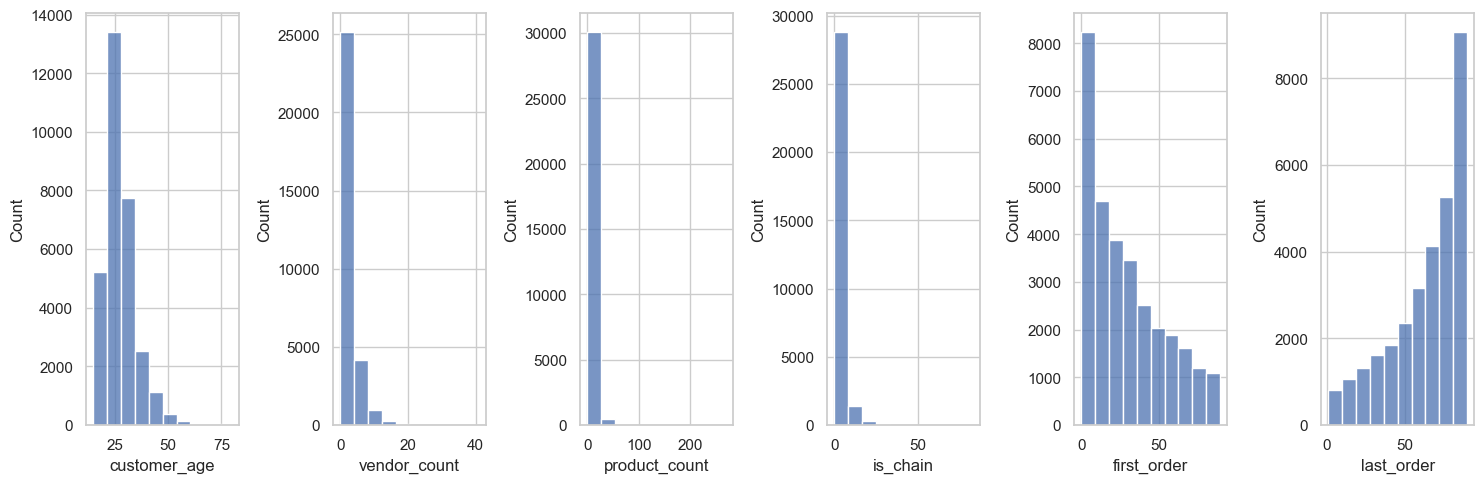

In [30]:
# Let's firstly plot some histograms for the numerical columns

first_subset_numerical = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']

fig, axes = plt.subplots(nrows=1, ncols=len(first_subset_numerical), figsize=(15, 5))

# Loop through each numerical column and plot
for i, col in enumerate(first_subset_numerical):
    sns.histplot(removal_df[col], bins=10, ax=axes[i], kde=False)  
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

* Customer Age:

The age distribution is highly skewed toward younger customers, with most of the values clustering between ages 20 and 30. There is a steep drop-off afterward, with very few customers above 50. This skewness might indicate that our business caters primarily to youngsters.

* Vendor count: 

The number of vendors used per order is predominantly low, with most customers interacting with fewer than 5 vendors. However, there are a few cases where customers are associated with a much larger number of vendors, which could be outliers.

* Product Count:

This distribution shows an extreme concentration of customers who order very few products, with a few ordering more than 50 or even 100 products. These extreme cases could indicate outliers or special bulk orders, and it may be worth investigating further.

* Is Chain:

This variable also exhibits a skewed distribution. If this is a binary variable (where 0 represents independent stores and 1 represents chains), it's unusual to see higher values (e.g., 50+). This could suggest data errors or misinterpretation of what the "chain" variable represents. For the sake of this dataset, we will assume that it represents the number of times a chain restaurant was ordered from.

* First Order / Last Order:

First Order seems to have a right-skewed distribution with most customers placing their first and last orders early in the observation period, and fewer continuing over time. The gradual increase in orders as time progresses is notable, which could be due to acquiring new customers. The exact opposite is occuring in the Last Order plot.

In order to investigate the weird distributions, we will plot some boxplots so that we can identify outliers and perhaps plot the histograms after this handling

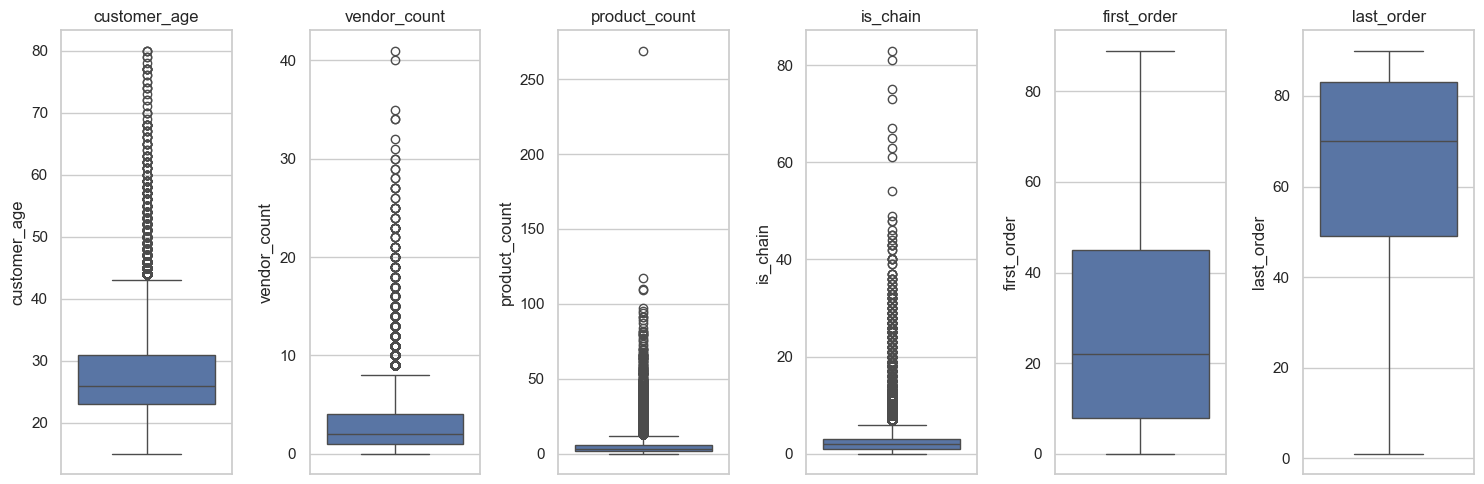

In [31]:
# Plotting boxplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(first_subset_numerical), figsize=(15, 5))

# Loop through each numerical column and plot boxplots
for i, col in enumerate(first_subset_numerical):
    sns.boxplot(y=removal_df[col], ax=axes[i])  # You can adjust orientation or limits if needed
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


* Customer Age:

The median age is around 30, and the data is fairly skewed to the right, with a number of outliers above age 50.
Most customers are between the ages of 20 and 40, which aligns with the skewed distribution seen in the histogram.
The outliers above age 60 should be examined, as they might represent a different demographic or could be data entry errors.

* Vendor Count:

The vendor count has many outliers, with values above 20 being extreme cases.
Most customers interact with fewer than 5 vendors, but there are outliers reaching up to 40 vendors. These could represent special cases or incorrect data entries.

* Product Count:

There are a few extreme outliers where customers order over 100 products, but the bulk of orders fall below 20.
The extreme values above 100 might represent bulk orders or errors, and it's important to assess whether these should be considered outliers or special cases.
A more typical range for orders seems to be around 0 to 10 products, as shown by the IQR.

* Is Chain:

There are many outliers, reaching from around 10 and up to 80. The extreme values might represent frequent customers who have habitual eating routines. Chain restaurants are typically easier and cheaper to order from so ordering from those more frequently could be the reason for those outliers.

* First Order and Last Order:

Both variables show a more evenly distributed range, with fewer outliers.
The first order and last order data suggest that customer activity is spread out, but there are no extreme outliers in this context.
The range is consistent, with customers placing their first orders throughout the observation period, and most placing their last orders toward the end of the observation period as seen in the previous histograms.

#### Handling Outliers and plot the distributions again

In [32]:
removal_df.shape

(30606, 59)

In [33]:
df_rows = df.shape[0]


removal_df_rows = removal_df.shape[0]


print(f"We can see that we lost {1 - removal_df_rows / df_rows:.2%} of the data after handling some anomalies "
      "so it's reasonable to do that.")


We can see that we lost 4.02% of the data after handling some anomalies so it's reasonable to do that.


### Handling outliers manually 

In [34]:
df_man = removal_df.copy()

In [35]:
filters_man_first_subset = (
    (removal_df['customer_age']<= 75 ) 
    &
    (removal_df['vendor_count']<= 30 ) 
    &
    (removal_df['product_count']<= 100 )
    &
    (removal_df['is_chain']<= 40 ) 

)

df_man = removal_df[filters_man_first_subset]

df_man_rows = df_man.shape[0]

print(f"We can see that we lost {1 - df_man_rows / df_rows:.2%} of the data after removing outliers "
      "which is plausible.")


We can see that we lost 4.15% of the data after removing outliers which is plausible.


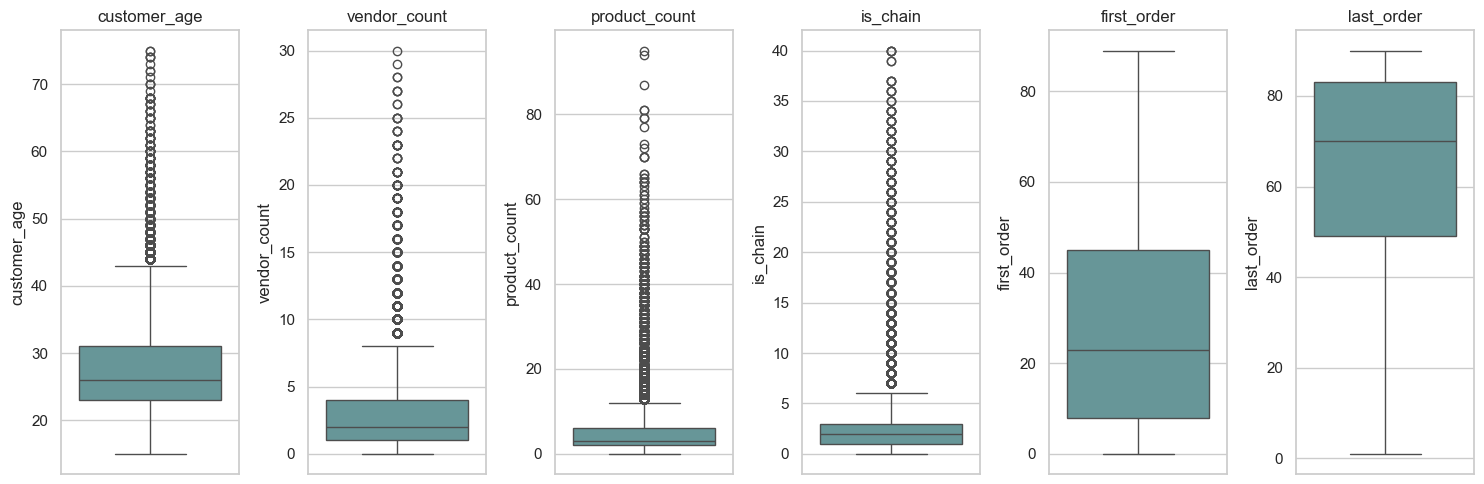

In [36]:
# Plotting boxplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(first_subset_numerical) , figsize=(15, 5))

# Loop through each numerical column and plot boxplots
for i, col in enumerate(first_subset_numerical):
    sns.boxplot(y=df_man[col], ax=axes[i], color='cadetblue')  # You can adjust orientation or limits if needed
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# We can see that there are still a lot of outliers in the data.

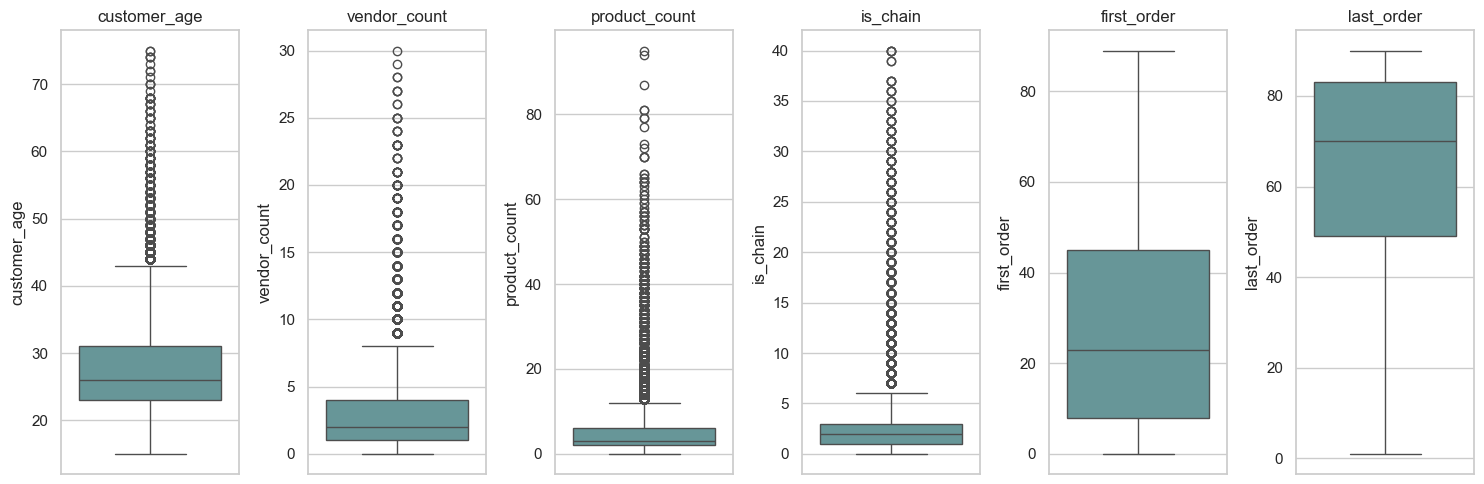

In [37]:
# Update the number of columns in the subplot based on the length of first_subset_numerical
fig, axes = plt.subplots(nrows=1, ncols=len(first_subset_numerical), figsize=(15, 5))

# Ensure axes is always a list to handle cases with a single plot
if len(first_subset_numerical) == 1:
    axes = [axes]

# Loop through each numerical column and plot boxplots
for i, col in enumerate(first_subset_numerical):
    sns.boxplot(y=df_man[col], ax=axes[i], color='cadetblue')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Let's plot the distributions again

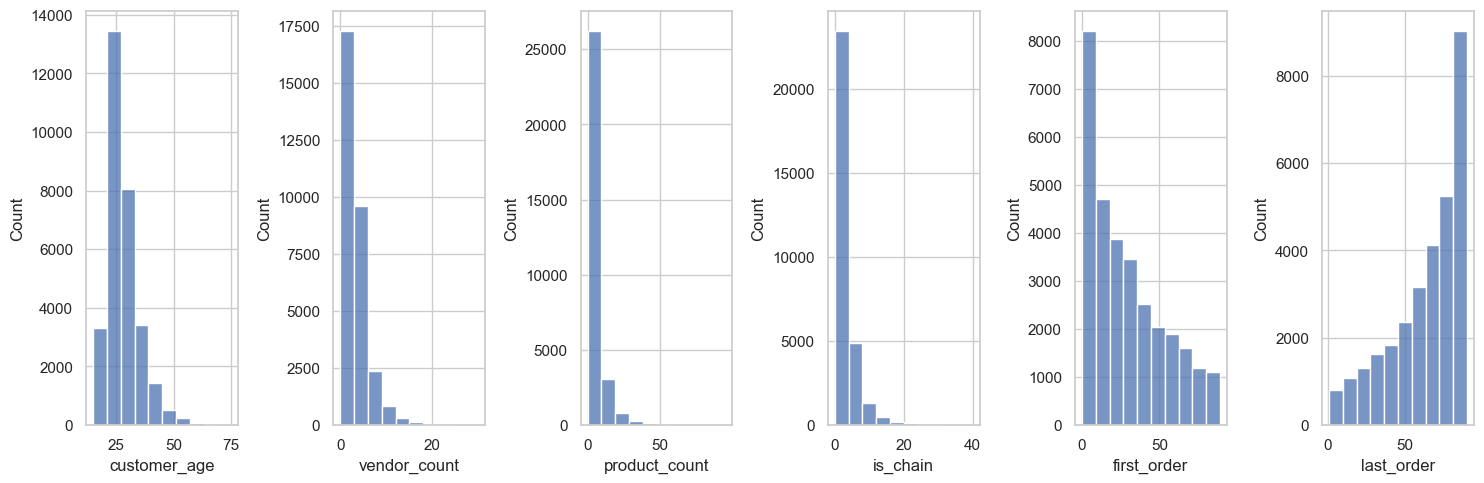

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=len(first_subset_numerical), figsize=(15, 5))

# Loop through each numerical column and plot
for i, col in enumerate(first_subset_numerical):
    sns.histplot(df_man[col], bins=10, ax=axes[i], kde=False) 
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

Handling the outliers manually has resulted in a more compact and consistent distribution across all variables, with fewer extreme values affecting the histograms.

#### Increasing the nr. of bins to see more detail

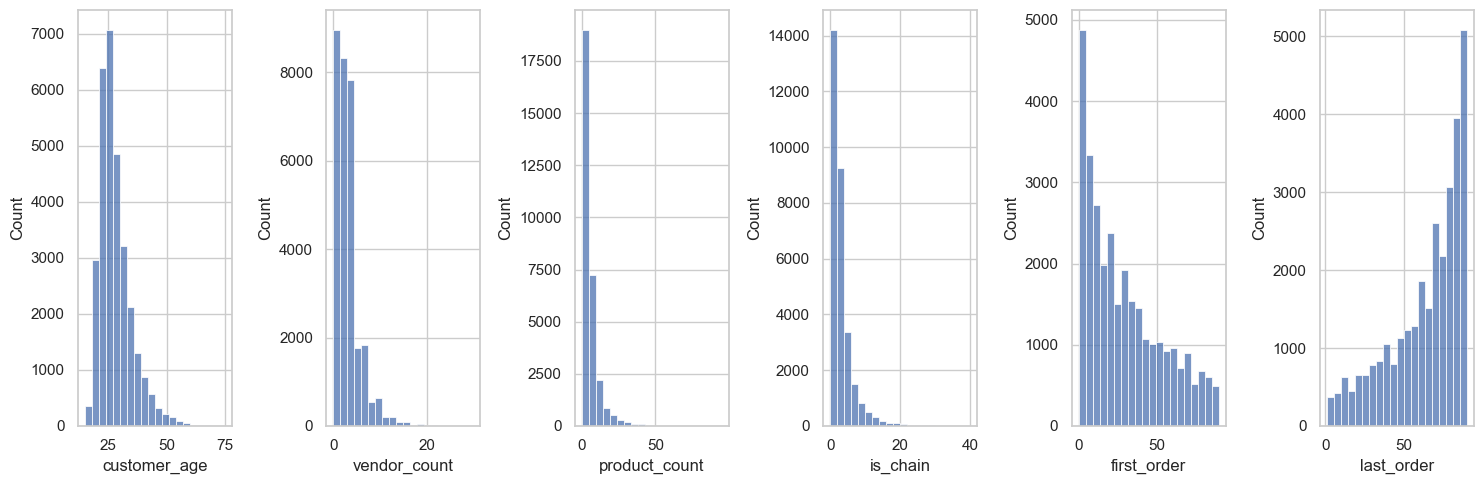

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=len(first_subset_numerical), figsize=(15, 5))

# Loop through each numerical column and plot
for i, col in enumerate(first_subset_numerical):
    sns.histplot(df_man[col], bins=20, ax=axes[i], kde=False)  # You can adjust the bins
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

With increasing the number of bins: <br/>

* Customer Age: It’s clear that there’s a consistent decline in customers as age increases starting from the 20s onward.

* Vendor Count: The more gradual distribution tail suggests that most customers still interact with a small number of vendors.

* Product Count: The more detailed view of the product count distribution shows a clearer distinction between smaller and larger orders, confirming that the majority of orders are small.

* First/Last Order: These variables are now better captured in terms of customer engagement over time, with some interesting spikes that may need analysis.

#### Subseting numericals

In [40]:
Cuisines = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                           'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                           'CUI_Thai']

Days = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
                          
Hours = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13',
                           'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

#### Performing the same analysis second_subset_numerical (Cuisines)

* Spent amount per cuisine

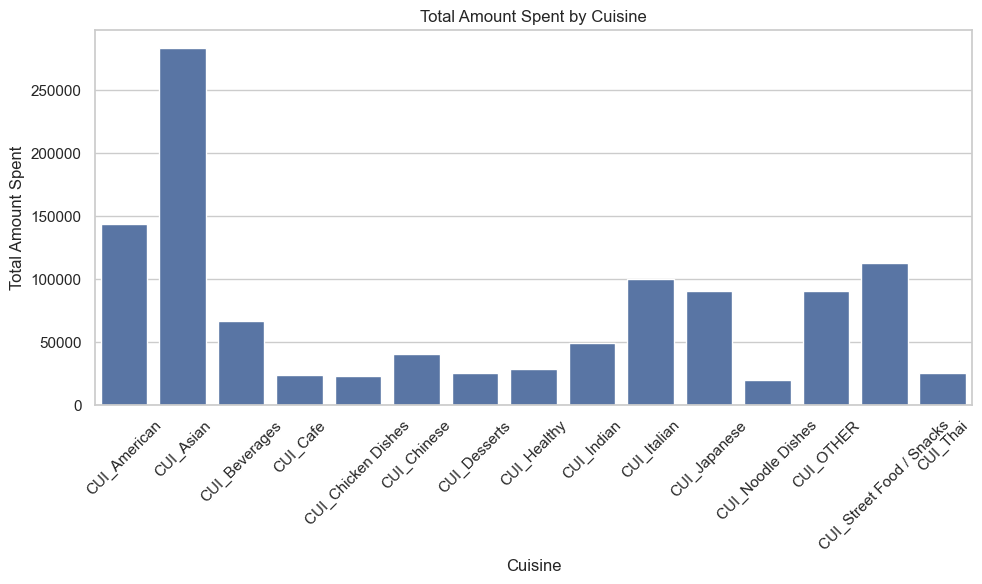

In [41]:
# Sum the amount spent for each cuisine
total_spent_per_cuisine = df_man[Cuisines].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=total_spent_per_cuisine.index, y=total_spent_per_cuisine.values)
plt.xticks(rotation=45)
plt.xlabel("Cuisine")  # Add this line to set the x-axis label
plt.title("Total Amount Spent by Cuisine")
plt.ylabel("Total Amount Spent")
plt.tight_layout()
plt.show()


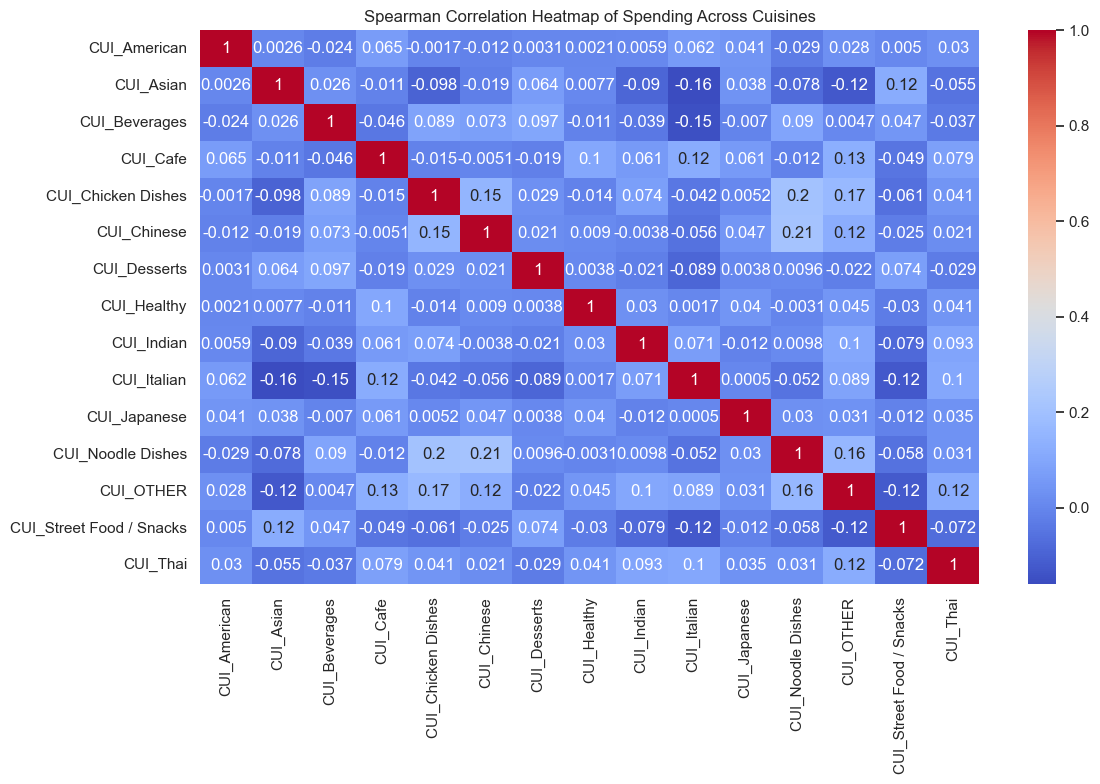

In [42]:
# Create a correlation matrix for the cuisine variables
corr_matrix = df_man[Cuisines].corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of Spending Across Cuisines")
plt.tight_layout()
plt.show()

Figure 6 - Spearman correlation heatmap across "CUI_i" , i = {American, ... , Thai } <a class="anchor" id="figure6"></a>

 The fact that most of the correlations are close to 0 suggests that spending on one type of cuisine does not predict or relate to spending on another cuisine. This means customers tend to spend on cuisines independently, without a clear pattern of spending between them.

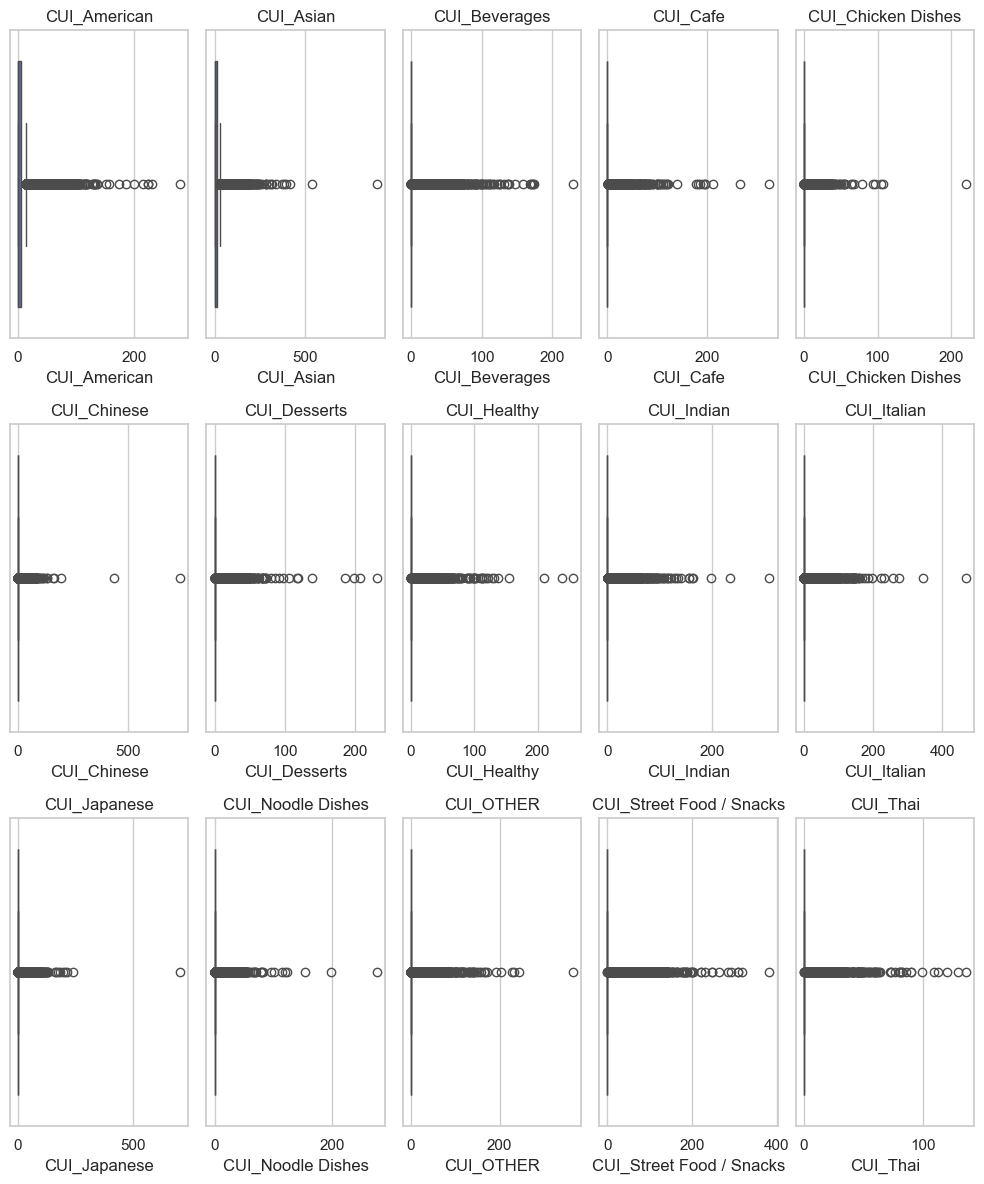

In [43]:
# Set number of columns (e.g., 5 plots per row)
n_cols = 5
n_rows = ceil(len(Cuisines) / n_cols)  # Calculate the number of rows

# Prepare the figure with multiple subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows * 4))  # Adjust width and height

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and plot horizontal boxplots
for i, col in enumerate(Cuisines):
    sns.boxplot(x=removal_df[col], ax=axes[i])  # Horizontal boxplot
    axes[i].set_title(col)

# Remove any empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

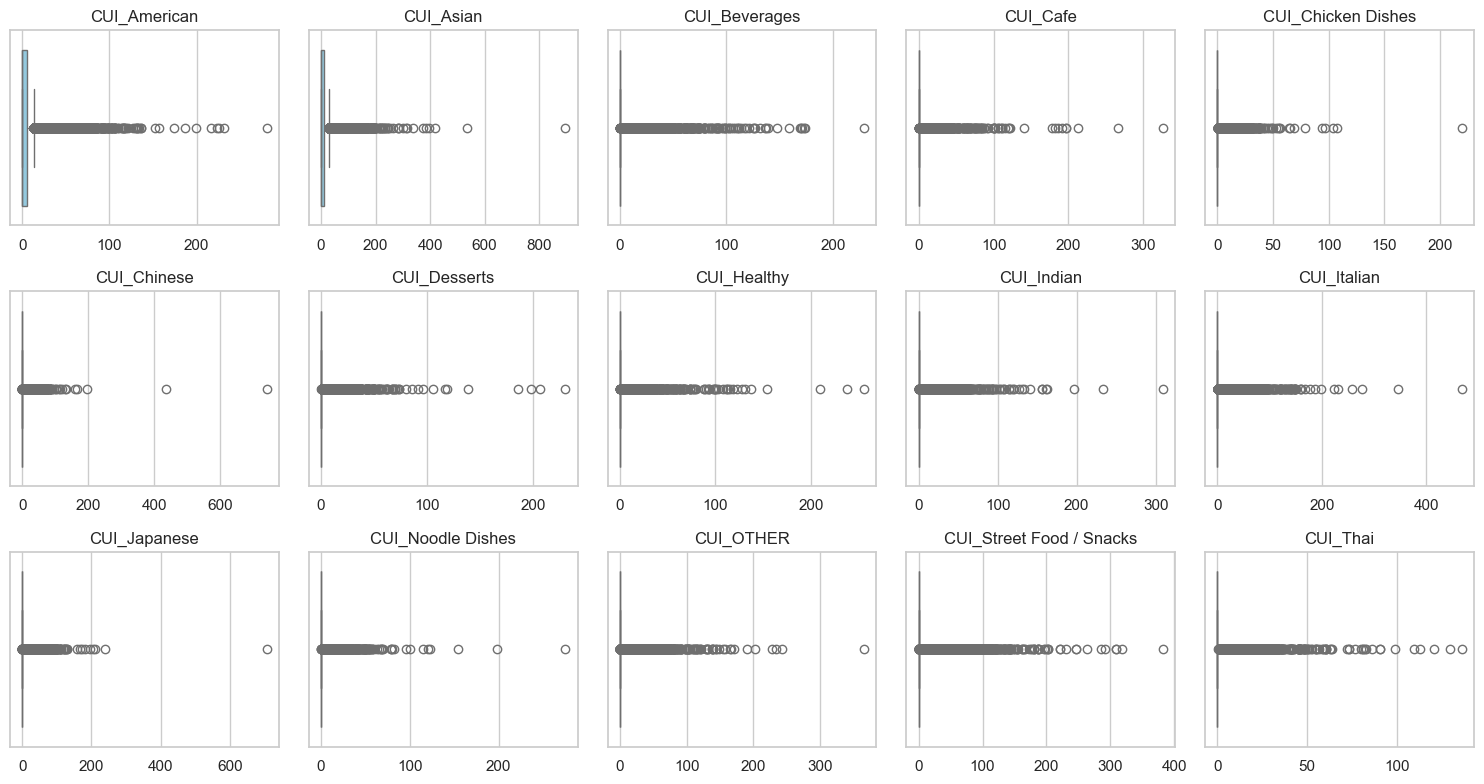

In [44]:
# Set up the figure with a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 8))  # Adjust layout to fit 15 subplots
axes = axes.flatten()  # Flatten the array for easier indexing

# Plot each cuisine as a separate boxplot in each subplot
for i, col in enumerate(Cuisines):
    sns.boxplot(x=removal_df[col], ax=axes[i], color="skyblue")  # Adjust color as needed
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")  # Remove x-axis label for a cleaner look

# Remove any unused subplots if Cuisines length is less than the grid (in this case, 15)
for j in range(len(Cuisines), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Figure 4 - Boxplots of "CUI_i", i = {American, ... , Thai } <a class="anchor" id="figure4"></a>

In [45]:
# Manual outliers removal

filters_man_cuisines = (
    (removal_df['CUI_American']<= 150 ) 
    &
    (removal_df['CUI_Asian']<= 400 ) 
    &
    (removal_df['CUI_Beverages']<= 150 )
    &
    (removal_df['CUI_Cafe']<= 150 ) 
    &
    (removal_df['CUI_Chicken Dishes']<= 100 ) 
    &
    (removal_df['CUI_Chinese']<= 200 )
    &
    (removal_df['CUI_Desserts']<= 100 ) 
    &
    (removal_df['CUI_Healthy']<= 150 ) 
     &
    (removal_df['CUI_Indian']<= 150 ) 
    &
    (removal_df['CUI_Italian']<= 200 )
    &
    (removal_df['CUI_Japanese']<= 150 ) 
    &
    (removal_df['CUI_Noodle Dishes']<= 100 ) 
    &
    (removal_df['CUI_OTHER']<= 150 )
    &
    (removal_df['CUI_Street Food / Snacks']<= 200 )
    &
    (removal_df['CUI_Thai']<= 80 )

)

df_man = removal_df[filters_man_cuisines]

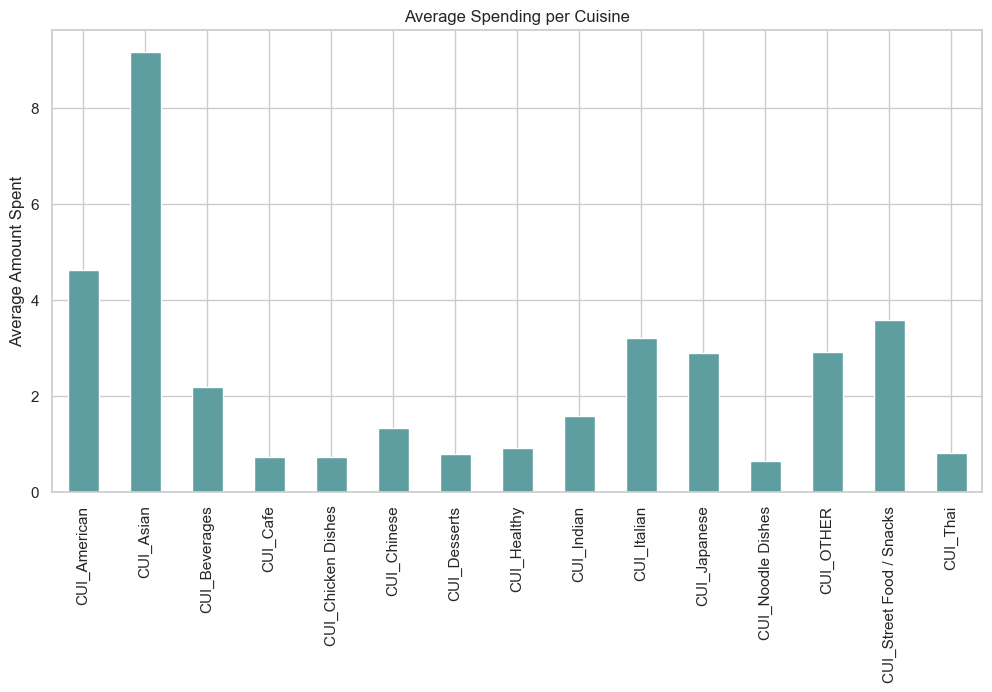

In [46]:
mean_spent_per_cuisine = df_man[Cuisines].mean()
mean_spent_per_cuisine.plot(kind='bar', figsize=(12, 6), title="Average Spending per Cuisine", color='cadetblue')
plt.ylabel('Average Amount Spent')
plt.show()

Figure 5 – Average amount spent in each cuisine “CUI_i” , i = {American,…, Thai} <a class="anchor" id="figure5"></a>

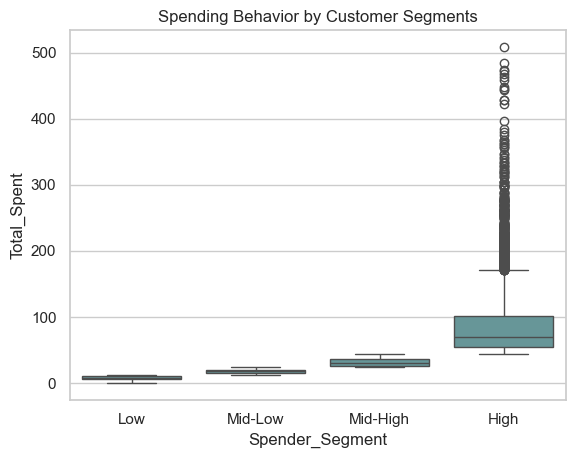

In [47]:
# Sum spending across all cuisines for each customer
df_man['Total_Spent'] = df_man[Cuisines].sum(axis=1)

# Segment customers into quantiles (e.g., top 25% high spenders)
df_man['Spender_Segment'] = pd.qcut(df_man['Total_Spent'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High']) # q = 4 divides the data in 4 equal-sized quartiles

#The first group (Low") contains the 25% of customers who spent the least.
#The second group ("Mid-Low") contains the next 25%, i.e., customers whose spending falls between the 25th and 50th percentile.
#The third group ("Mid-High") contains customers whose spending is between the 50th and 75th percentile.
#The fourth group ("High") contains the top 25% of spenders, or the customers who spent the most.

# Analyze spending habits of different segments
sns.boxplot(x='Spender_Segment', y='Total_Spent', data=df_man, color = 'cadetblue')
plt.title('Spending Behavior by Customer Segments')
plt.show()


##### Low/Mid-Low/Mid-High Spending Range: 

The customers in the "Low," "Mid-Low," and "Mid-High" segments have fairly narrow spending distributions. Their median spending values are low, typically under $50.

Minimal variation: These segments have small IQRs, meaning most of the customers in these segments are spending relatively similar amounts within their respective groups. 

Outliers: There are no outliers for the first 3 categories but the last seems to have quite a few.

#### High Spenders:

* Broader spending range: The "High" spending segment exhibits a much broader distribution of total spending, with a much larger IQR showing that the customers are more diverse in their spending habits, ranging from moderate to very high amounts.

* Median spending: The median spending for 'high' spenders is significantly higher than the other groups, around $100, indicating that this group consistently spends more.

* Outliers: There are many outliers in this group, with some customers spending over $500. This suggests that a small number of customers spend disproportionately more compared to the rest of the population.

#### Performing same analysis on Days

* Spent amount per day

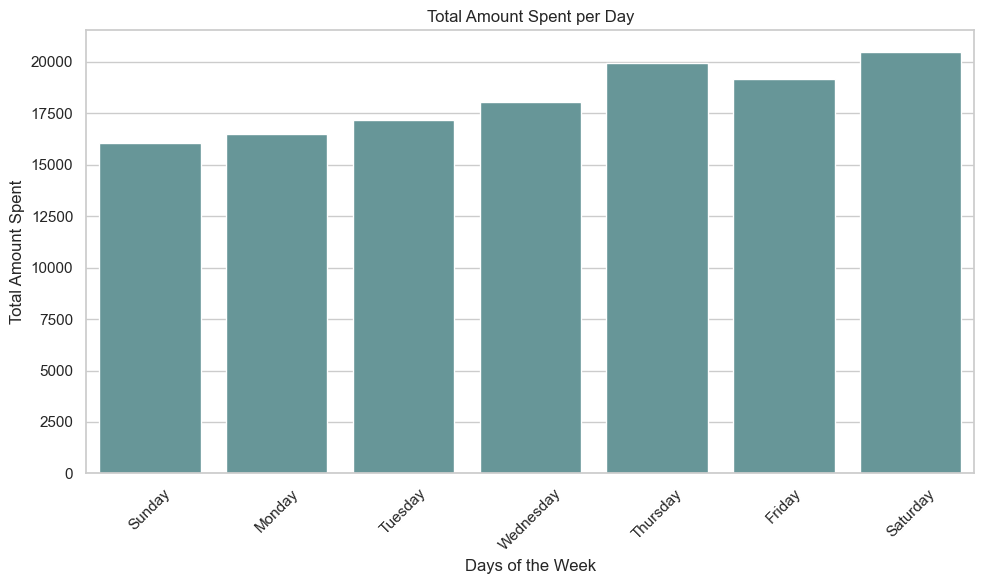

In [48]:
# Sum the amount spent for each cuisine
total_spent_per_day = df_man[Days].sum()

# Define the day names
day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=total_spent_per_day.index, y=total_spent_per_day.values, color='cadetblue')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)
plt.xlabel("Days of the Week")  # Add this line to set the x-axis label
plt.title("Total Amount Spent per Day")
plt.ylabel("Total Amount Spent")
plt.tight_layout()
plt.show()

Figure 7– Total amount spent in each cuisine “CUI_i” , i = {American,…, Thai} per day of the week <a class="anchor" id="figure7"></a>

We can see that Saturday was the day where most orders were placed, followed by Thursday.

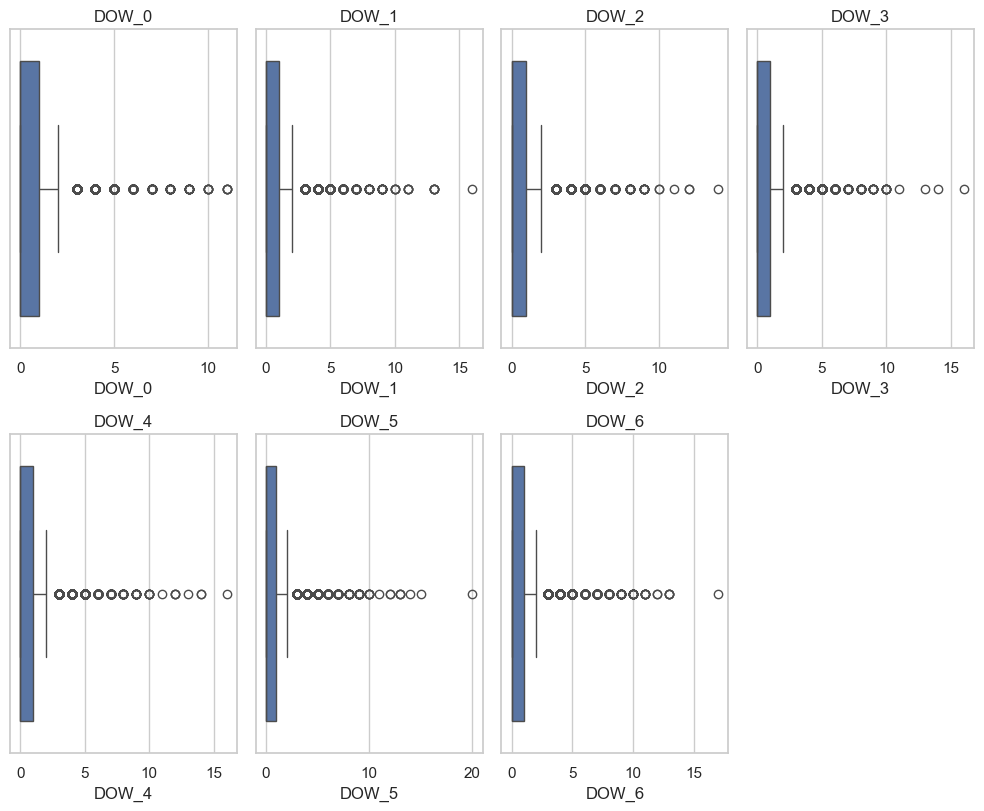

In [49]:
# Set number of columns (e.g., 5 plots per row)
n_cols = 4
n_rows = ceil(len(Hours) / n_cols)  # Calculate the number of rows

# Prepare the figure with multiple subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows * 4))  # Adjust width and height

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and plot horizontal boxplots
for i, col in enumerate(Days):
    sns.boxplot(x=df_man[col], ax=axes[i])  # Horizontal boxplot
    axes[i].set_title(col)

# Remove any empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

* Manual outliers removal 

In [50]:
filters_man_days = (
    #(removal_df['DOW_0']<= 150 ) #not performing because they're equally spaced
    (df_man['DOW_1']<= 10 ) 
    &
    (df_man['DOW_2']<= 10 )
    &
    (df_man['DOW_3']<= 10 ) 
    &
    (df_man['DOW_4']<= 15 ) 
    &
    (df_man['DOW_5']<= 15 )
    &
    (df_man['DOW_6']<= 15 ) 

)

df_man = df_man[filters_man_days]

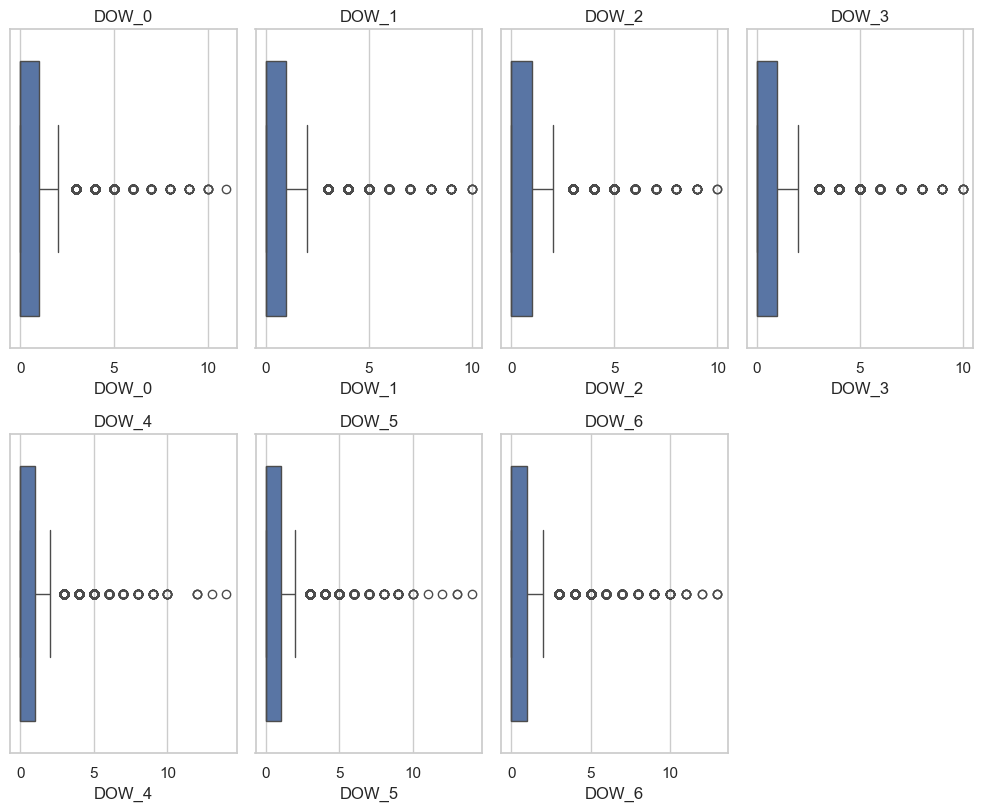

In [51]:
# Plotting after manual outlier handling 

# Set number of columns (e.g., 5 plots per row)
n_cols = 4
n_rows = ceil(len(Hours) / n_cols)  # Calculate the number of rows

# Prepare the figure with multiple subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows * 4))  # Adjust width and height

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and plot horizontal boxplots
for i, col in enumerate(Days):
    sns.boxplot(x=df_man[col], ax=axes[i])  # Horizontal boxplot
    axes[i].set_title(col)

# Remove any empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

For each day (DOW_0 to DOW_6), the median number of orders is quite low, close to 0. This suggests that for most customers, the number of orders placed on any given day of the week is relatively small.

There are numerous outliers for each day, with some customers placing significantly more orders on certain days of the week. These outliers show that while the majority of customers place few orders, there are occasional customers who place a much higher number of orders on certain days.
The highest outlier is visible on DOW_6, where one customer placed nearly 20 orders in a single day.

The general pattern is consistent across all days: a narrow IQR with most customers placing fewer than 5 orders per day, accompanied by several outliers.

* What This Suggests:

The outliers shows that some customers are much more active, placing many orders on certain days, potentially indicating heavy usage on specific days due to certain events (i.e., promotions, special occasions, weekends).

Sunday may show more leisure-driven behavior, while (DOW_3 which is wednesday : midweek ) could reflect a combination of promotions, office orders, or other factors that boost order volume.


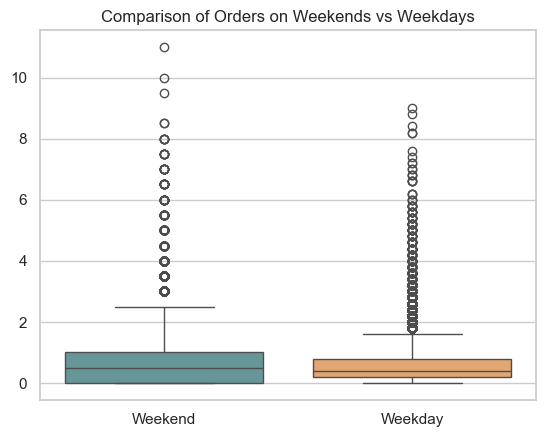

In [52]:
# Compare average number of orders between weekdays and weekends
df_man['Weekend'] = df_man[['DOW_0', 'DOW_6']].mean(axis=1)
df_man['Weekday'] = df_man[['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']].mean(axis=1)

# Plotting the comparison
sns.boxplot(data=df_man[['Weekend', 'Weekday']], palette={"Weekend": "cadetblue", "Weekday": "sandybrown"})
plt.title("Comparison of Orders on Weekends vs Weekdays")
plt.show()


* Weekends tend to see higher variability in customer orders, with a greater number of outliers (customers placing more orders). This could indicate increased order activity on weekends, possibly due to factors like leisure time, special weekend promotions, or weekend events.

* Weekdays show more consistent and lower order numbers, but some customers still place multiple orders, though less frequently than on weekends.

In [53]:
# Create an empty DataFrame to store results
promo_orders_df = pd.DataFrame()

# Loop through all DOW columns (DOW_0 to DOW_6) and collect average orders by promotion category
for dow in range(7):  # 0 to 6 representing DOW_0 to DOW_6
    column_name = f'DOW_{dow}'
    promo_orders = removal_df.groupby('last_promo')[column_name].mean()
    
    # Add the results to the DataFrame, each DOW as a column
    promo_orders_df[column_name] = promo_orders

# Reset index to turn 'last_promo' into a column for plotting
promo_orders_df = promo_orders_df.reset_index()

# Display the DataFrame
print(promo_orders_df)

  last_promo     DOW_0     DOW_1     DOW_2     DOW_3     DOW_4     DOW_5  \
0          -  0.627840  0.646504  0.657928  0.689076  0.769600  0.727154   
1   DELIVERY  0.377200  0.387070  0.416022  0.440697  0.463399  0.458957   
2   DISCOUNT  0.454294  0.477839  0.515928  0.541320  0.590028  0.587719   
3    FREEBIE  0.529102  0.522874  0.570299  0.593533  0.648623  0.617246   

      DOW_6  
0  0.795568  
1  0.464386  
2  0.611496  
3  0.657246  


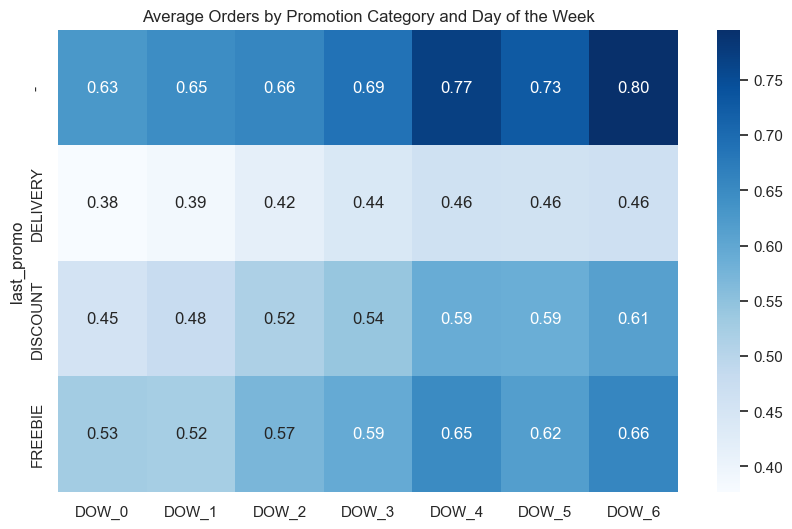

In [54]:
# Set 'last_promo' as the index for the heatmap
promo_orders_df.set_index('last_promo', inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(promo_orders_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Average Orders by Promotion Category and Day of the Week")
plt.show()


* Non-promo customers place more orders, especially on weekends, with a peak on Saturday (DOW_6).

* Freebie promotions seem to be the most effective type of promotion, driving higher orders on both weekdays and weekends.

* Delivery promotions are the least impactful, with consistently lower average orders across all days.

 * Weekends are the most active days for all groups, but promotions like freebies and discounts seem to have more influence on weekend orders compared to delivery promotions.

#### Business implications:

1) Since non-promo customers place more orders, especially on weekends, the business can focus on building loyalty programs or rewards for these customers. These customers are already engaging without promotional incentives, so creating exclusive benefits for them (such as bigger discounts) could further boost loyalty and increasing # of orders.

2) Data suggests that freebies work better than direct discounts or delivery promotions, so it may be cost-effective to focus on providing small free items or services (e.g., a free side dish or delivery) instead of cutting prices across the board.

3) Since delivery promotions are the least impactful, the business might need to rethink their structure. Perhaps these promotions are not appealing enough, or they’re not well-targeted. One approach could be to combine delivery promotions with other incentives, such as a free item with free delivery.

4) With weekends being the most active days across all groups, this suggests that customers are more likely to order during this time. The business should consider targeted promotions and marketing efforts focused on weekends to maximize revenue.



#### Performing same analysis on Hours

* Spent amount per hour

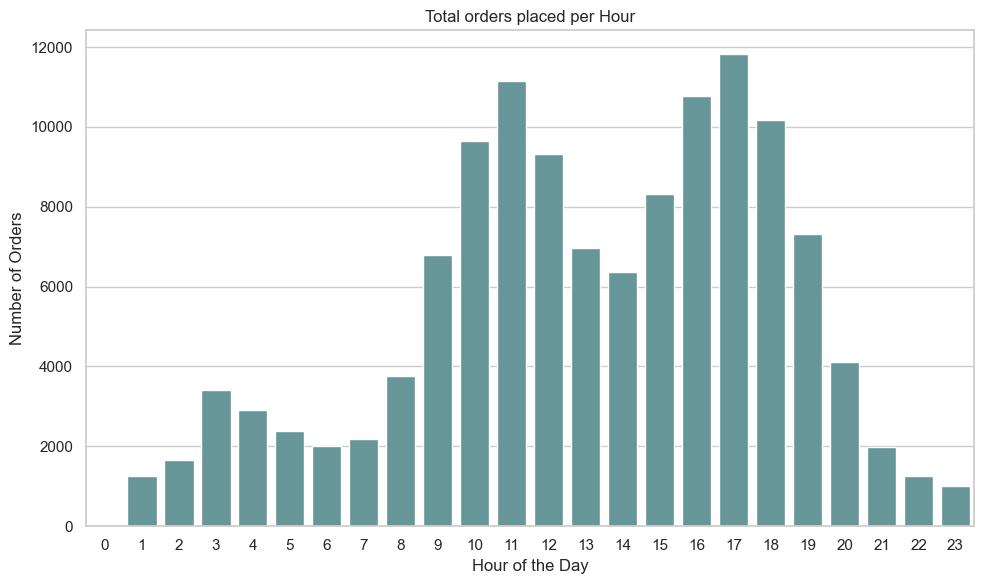

In [55]:
# Sum the amount spent for each cuisine
total_orders_per_hour = df_man[Hours].sum() # 

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=[i for i in range(0,24)], y=total_orders_per_hour.values, color='cadetblue')
plt.xticks(rotation=0)
plt.title("Total orders placed per Hour")
plt.ylabel("Number of Orders")
plt.xlabel('Hour of the Day')
plt.tight_layout()
plt.show()

Figure 8 - Histogram of total orders placed per hour <a class="anchor" id="figure8"></a>

#### Distribution of number of orders per hour for weekday and weekend

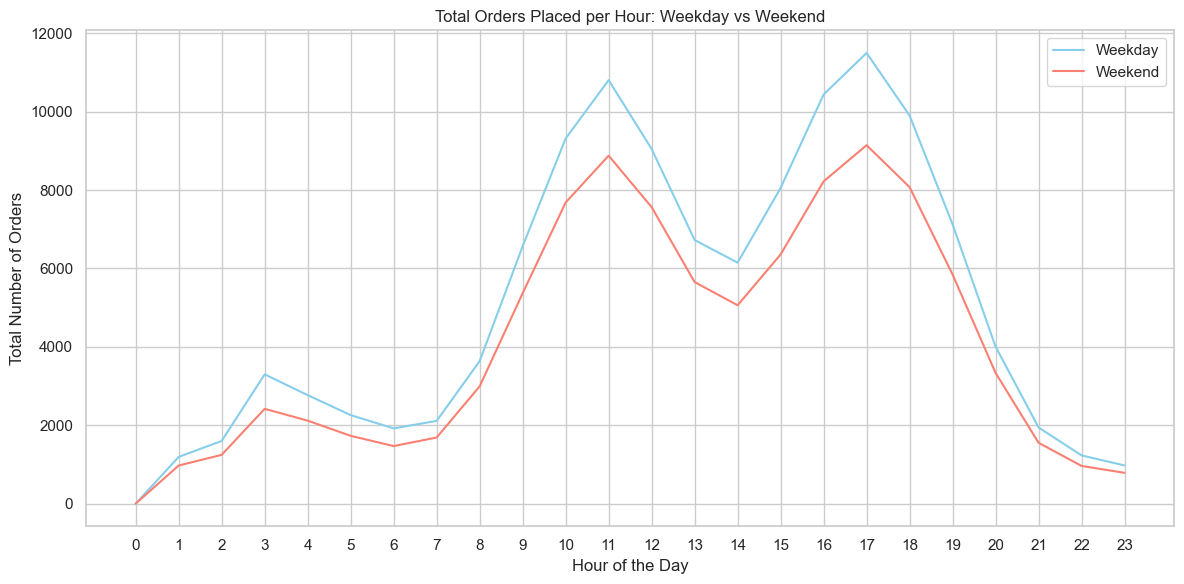

In [56]:
# Sum total orders per hour for weekdays and weekends
weekend_orders_per_hour = df_man[df_man[['DOW_0', 'DOW_6']].sum(axis=1) > 0].filter(like='HR_').sum()
weekday_orders_per_hour = df_man[df_man[['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']].sum(axis=1) > 0].filter(like='HR_').sum()

# Create a DataFrame for easy plotting
orders_per_hour_df = pd.DataFrame({
    'Hour': range(24),
    'Weekday': weekday_orders_per_hour.values,
    'Weekend': weekend_orders_per_hour.values
})

# Set up the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Weekday', data=orders_per_hour_df, label='Weekday', color='skyblue')
sns.lineplot(x='Hour', y='Weekend', data=orders_per_hour_df, label='Weekend', color='salmon')

# Add plot details
plt.title("Total Orders Placed per Hour: Weekday vs Weekend")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Number of Orders")
plt.xticks(range(0, 24), labels=[i for i in range(24)], rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

Figure 9 - Total orders placed per hour (weekday vs weekend) <a class="anchor" id="figure9"></a>

1) Peak Spending Hours:

HR_16 (4 PM) and HR_17 (5 PM) have the highest total amount spent, indicating that these are the busiest hours for customers, likely around dinner time.

The spending starts to increase sharply from HR_10 (10 AM) and peaks between HR_16 to HR_17 (4 PM to 5 PM). This suggests that customers may start ordering as early as late morning, with a rise in spending in the evening hours.

2. Low spending hours

HR_0 (midnight), HR_1 (1 AM), HR_22 (10 PM), and HR_23 (11 PM) show the lowest spending. These hours are outside typical meal times, so it's expected that fewer orders and less spending occur during these hours.
Spending is quite low from HR_2 (2 AM) to HR_7 (7 AM), which could represent off-peak hours where most people are sleeping.

The chart highlights that the busiest hours for customer spending are in the late afternoon and early evening (4 PM to 6 PM), making this the most lucrative time for orders.

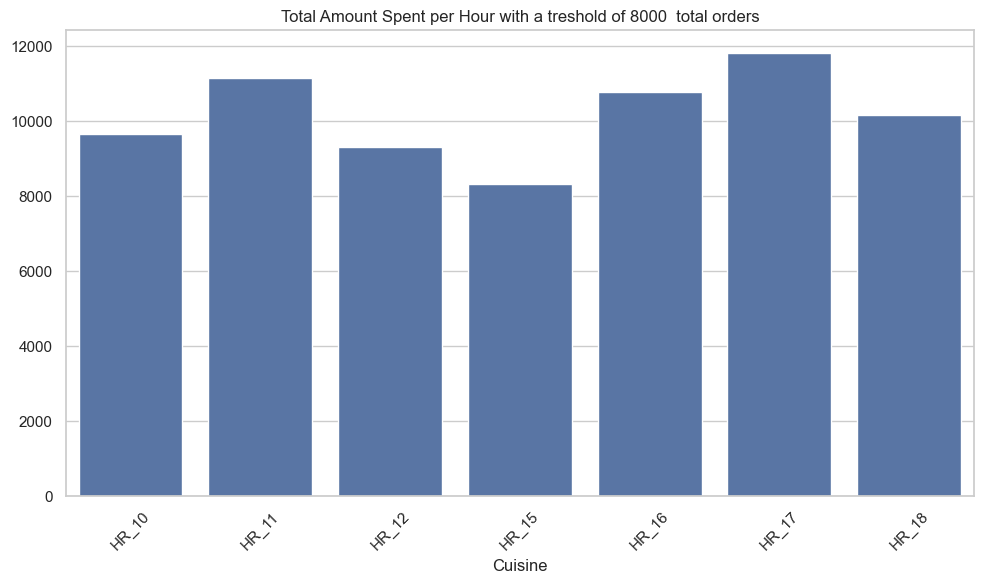

In [57]:
# Apply the threshold filter to identify hours with a total spending over 8000
filter_hours = df_man[Hours].sum(axis=0) > 8000


# Select the hours that meet the threshold
filtered_data = df_man[Hours].sum(axis=0)[filter_hours] 

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_data.index, y=filtered_data.values)
plt.xticks(rotation=45)
plt.xlabel("Cuisine")  # Add this line to set the x-axis label
plt.title("Total Amount Spent per Hour with a treshold of 8000  total orders")
# plt.ylabel("Total Amount Spent")
plt.tight_layout()
plt.show()

These are the hours were we have the most orders (HR_10, HR_11 , HR_12 , HR_15, HR_16, HR_17 AND HR_18)

* Lunch Rush (HR_11 to HR_13):

   The time frame between 10 AM and 1 PM (HR_10 to HR_13) likely corresponds to the lunch rush in a city, where many people, whether working in offices or on the move, are ordering food. It's common in urban areas for people to rely on food delivery services during their workday lunch break, as it's more convenient than cooking or eating out.
Afternoon/Early Evening (HR_15 to HR_18):

* Afternoon/Early Evening (HR_15 to HR_18): 
 
  The spike during these hours (especially HR_16 and HR_17) can be attributed to early dinner orders or late lunch. Many individuals and families in cities may prefer to order dinner earlier, especially during weekdays, to avoid cooking after a long day of work or school.
Additionally, after-school snack and meal orders could contribute to the rise in orders during these hours. Schools typically end between 2 PM and 4 PM, and both parents and children may opt for convenient food delivery services.

<b> Also, as people are in office or school during those hours that justifies the fact that we don't have the same volume of orders for dinner , as we have in early lunch / lunch / late lunch 
    </b>

#### Boxplots for hours

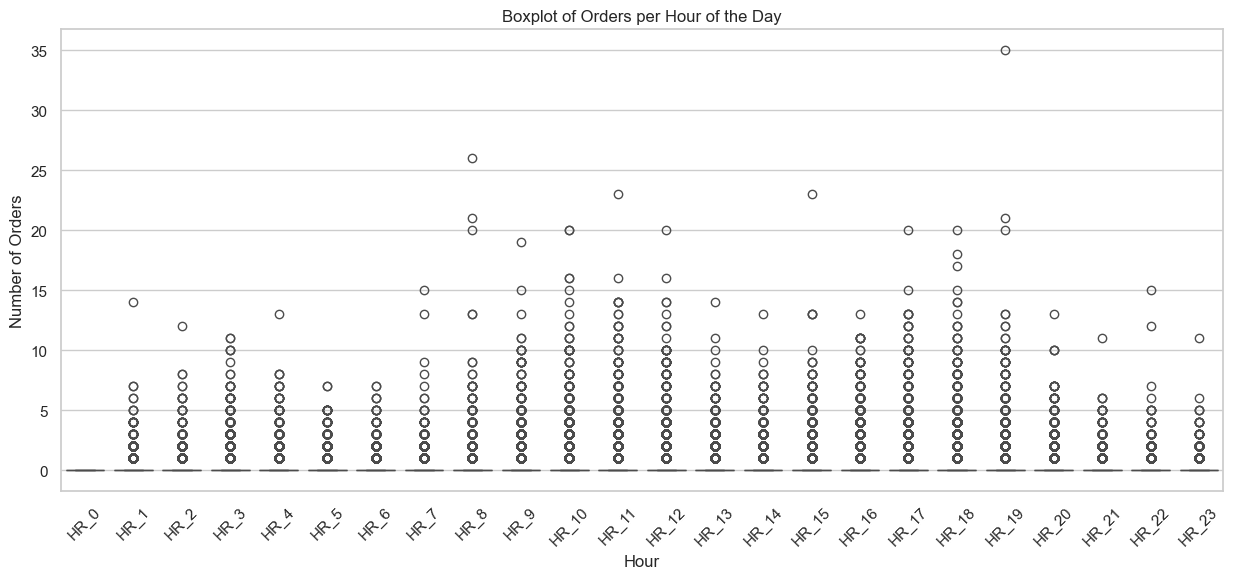

In [58]:
# Melt the DataFrame to create a long format for hours
df_hourly = df_man.melt(value_vars=Hours, var_name='Hour', value_name='Nr_of_orders')

# Plot the distribution of orders per hour
plt.figure(figsize=(15, 6))
sns.boxplot(x='Hour', y='Nr_of_orders', data=df_hourly)
plt.title('Boxplot of Orders per Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()



Order Distribution: The boxplots reveal a pattern of small orders scattered throughout the day, but with some higher order values around the peak hours. This could indicate special occasions or bulk orders during lunch or dinner time.

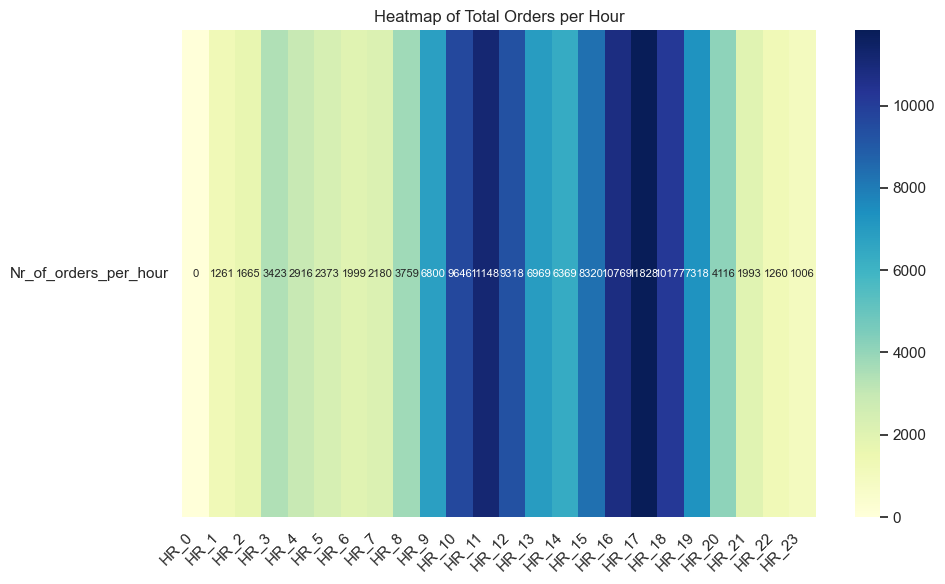

In [59]:
# Aggregate the total or average spending per hour
hourly_total_orders = df_man[Hours].sum()

# Reshape the data into a format suitable for a heatmap (in this case, it's already in a usable format)
hourly_total_hours_df = pd.DataFrame(hourly_total_orders, columns=['Nr_of_orders_per_hour'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_total_hours_df.T, annot=True, cmap="YlGnBu", cbar=True , fmt=".0f", annot_kws={"size": 8})

# Rotate the x-ticks and y-ticks for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust the title and layout
plt.title("Heatmap of Total Orders per Hour")
plt.tight_layout()
plt.show()


Peak Ordering Hours: The heatmap shows clear peaks during lunchtime and dinner hours (HR_10 to HR_12 and HR_16 to HR_18). This aligns with typical meal times in a city, suggesting that most orders are placed during these periods.

Low Ordering Hours: There is significantly less activity during the early morning (HR_0 to HR_7) and late-night hours (HR_20 onwards), which could be due to fewer restaurants being open and less consumer demand during non-meal times.



# Feature Engineering <a class="anchor" id="featureengineering"></a>

#### 1. First Subset (Customer Attributes & Orders):

* Order Range: Calculate the range of days from the customer’s last order relative to their first order placement date.

In [60]:
df_man['order_range'] = df_man['last_order'] - df_man['first_order']

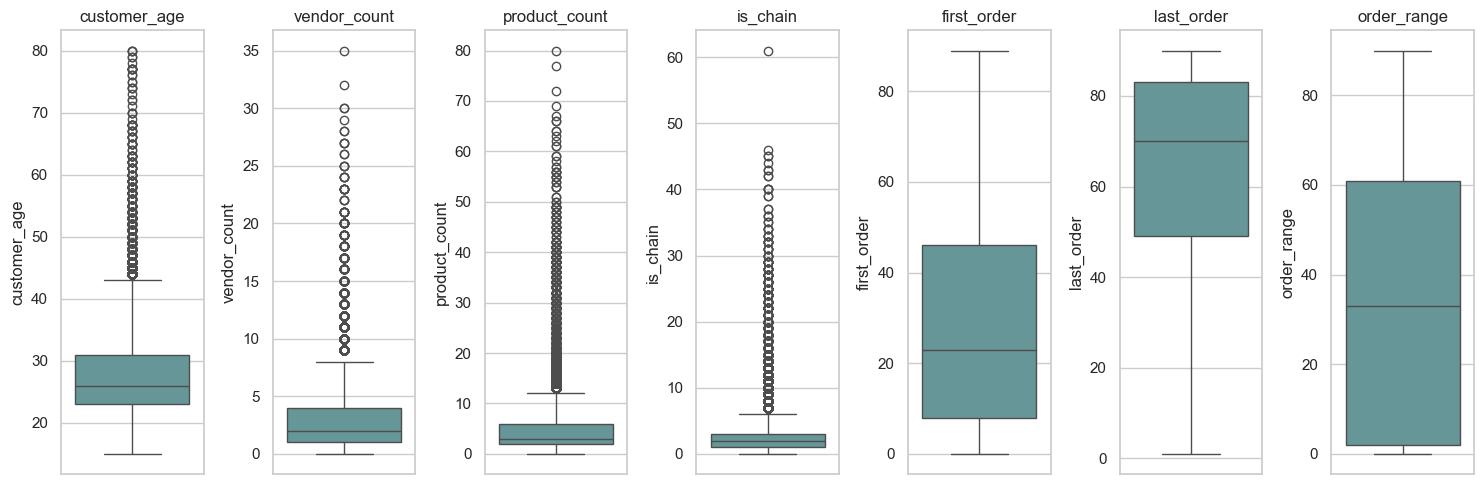

In [61]:
# Plotting boxplots for each variable
first_subset_numerical.append("order_range")
fig, axes = plt.subplots(nrows=1, ncols=len(first_subset_numerical) , figsize=(15, 5))

# Loop through each numerical column and plot boxplots
for i, col in enumerate(first_subset_numerical):
    sns.boxplot(y=df_man[col], ax=axes[i], color='cadetblue')  # You can adjust orientation or limits if needed
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# We can see that there are still a lot of outliers in the data.

Figure 3  – Boxplots of “customer_age”, “vendor_count” , “product_count” , “is_chain” , “first_order” , “last_order” and “order_range” (after manual extreme outliers removal) <a class="anchor" id="figure3"></a>

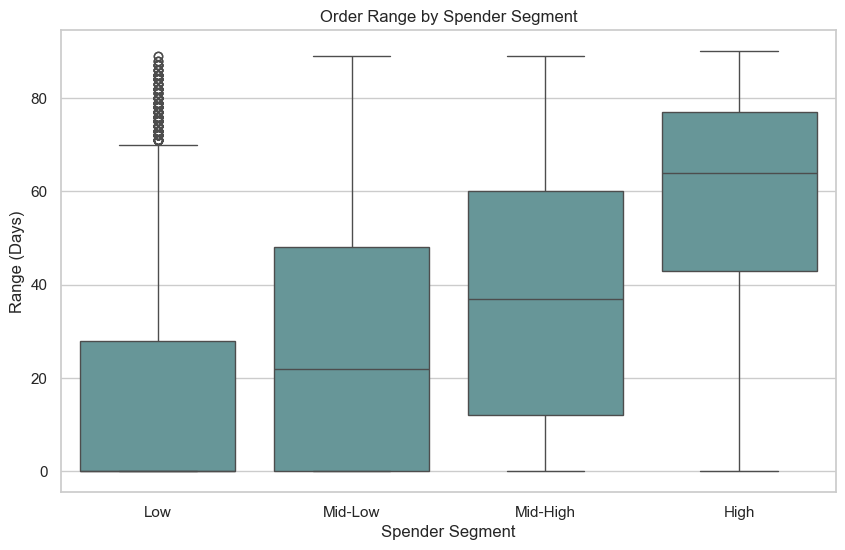

In [62]:
# Sum spending across all cuisines for each customer
df_man['Total_Spent'] = df_man[Cuisines].sum(axis=1)

# Segment customers into quantiles (e.g., top 25% high spenders)
df_man['Spender_Segment'] = pd.qcut(df_man['Total_Spent'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High']) # q = 4 divides the data in 4 equal-sized quartiles

# Plotting boxplot for order recency by spender segment

plt.figure(figsize=(10, 6))
sns.boxplot(x='Spender_Segment', y='order_range', data=df_man, color='cadetblue')
plt.title("Order Range by Spender Segment")
plt.xlabel("Spender Segment")
plt.ylabel("Range (Days)")
plt.show()


Figure 10 – Boxplots of order range grouped by spender segment <a class="anchor" id="figure10"></a>

* Order Range and Promotion Usage:


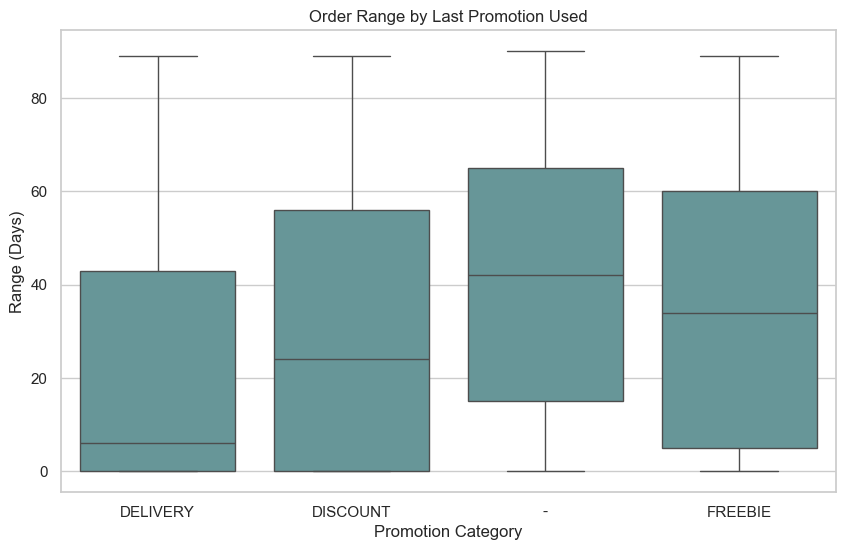

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='last_promo', y='order_range', data=df_man, color='cadetblue')
plt.title("Order Range by Last Promotion Used")
plt.xlabel("Promotion Category")
plt.ylabel("Range (Days)")
plt.show()


Delivery promotions appear to drive more frequent ordering behavior, whereas discounts and freebies may entice a broader customer base but don’t necessarily lead to immediate repeat business.

* Average order range per spender segment

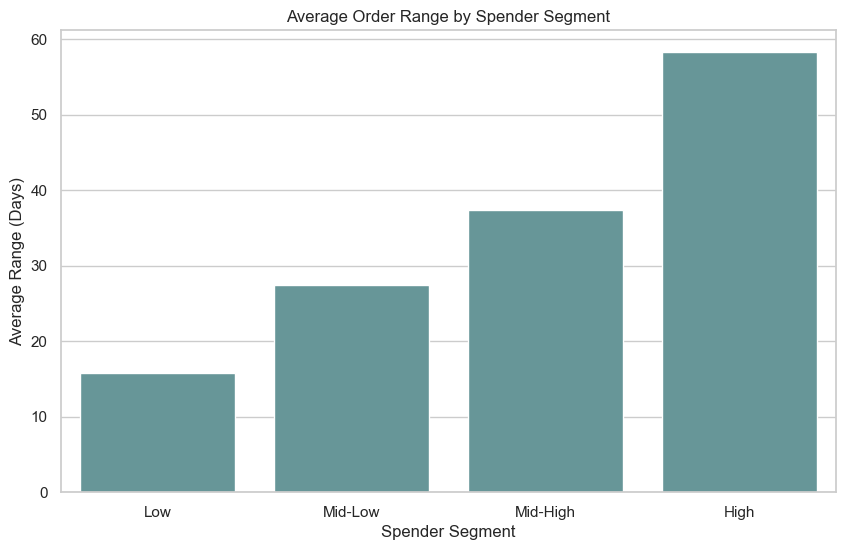

In [64]:
# Group by 'Spender_Segment' and calculate the mean recency for each segment
average_recency_per_segment = df_man.groupby('Spender_Segment')['order_range'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=average_recency_per_segment.index, y=average_recency_per_segment.values, color='cadetblue')
plt.title("Average Order Range by Spender Segment")
plt.xlabel("Spender Segment")
plt.ylabel("Average Range (Days)")
plt.show()


Low spenders have the shortest order range, indicating they order more frequently, while Mid-Low and Mid-High spenders order less often with moderate range values. High spenders have the longest order range, suggesting they order less frequently. To improve retention, strategies could focus on reducing the time between purchases for high spenders, while leveraging the frequent activity of low spenders.

* Feature Engineering: Total spent 


In [65]:
# Create a new feature that sums the spending across all cuisines
df_man['total_spent_on_cuisines'] = df_man[Cuisines].sum(axis=1) # axis=1 to sum horizontally

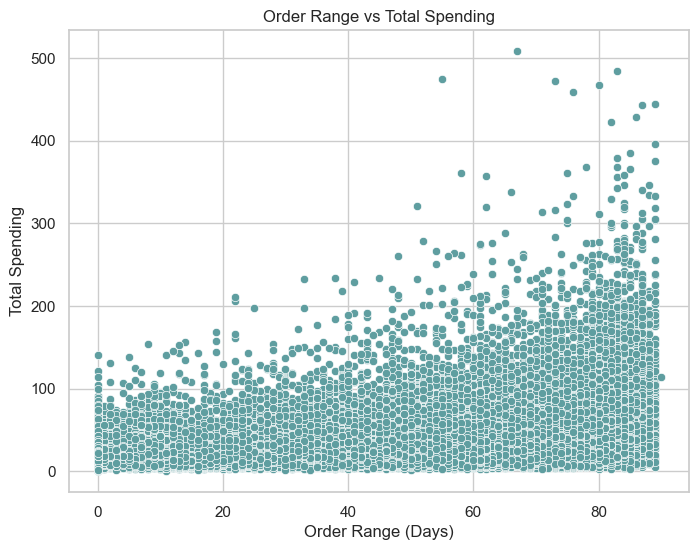

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='order_range', y='total_spent_on_cuisines', data=df_man, color='cadetblue')
plt.title("Order Range vs Total Spending")
plt.xlabel("Order Range (Days)")
plt.ylabel("Total Spending")
plt.show()

The scatter plot shows that there is no clear strong positive correlation between order range and total spending. While there are some outliers who spend significantly more as their range increases, most customers tend to maintain similar spending levels regardless of their order range. The wide distribution of total spending across all range values indicates that the relationship is not directly proportional, with a few high spenders driving any perceived upward trend. Overall, outliers influence the view, but the majority of customers do not exhibit significantly higher spending as their order range increases.

* Which age group spends more?

In [67]:
# Create more detailed age groups with specified bins and labels
df_man['age_group'] = pd.cut(df_man['customer_age'], 
                             bins=[15, 20, 30, 40, 50, 60, 80], 
                             labels=['Teen', 'Young Adult', 'Adult', 'Middle-Aged Adult', 'Older Adult', 'Senior'])

In [68]:
# Group by 'age_group' and calculate the average spending per group
avg_spending_by_age = df_man.groupby('age_group')['total_spent_on_cuisines'].mean()


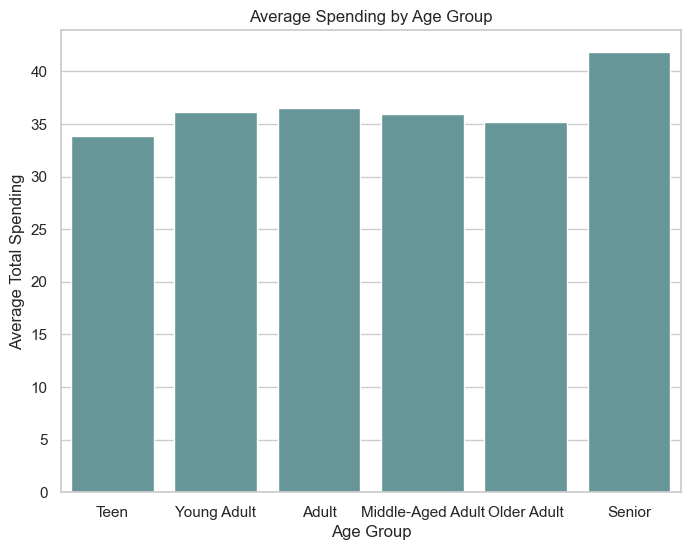

In [69]:
# Plot the average spending by age group
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values, color='cadetblue')
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Spending')
plt.show()

Overall, this suggests that senior customers are the highest spenders, while younger age groups, like teens, spend less on average. These insights could be valuable for targeting marketing efforts and creating promotions tailored to different age groups.

* Number of Orders Per Hour by Age Group

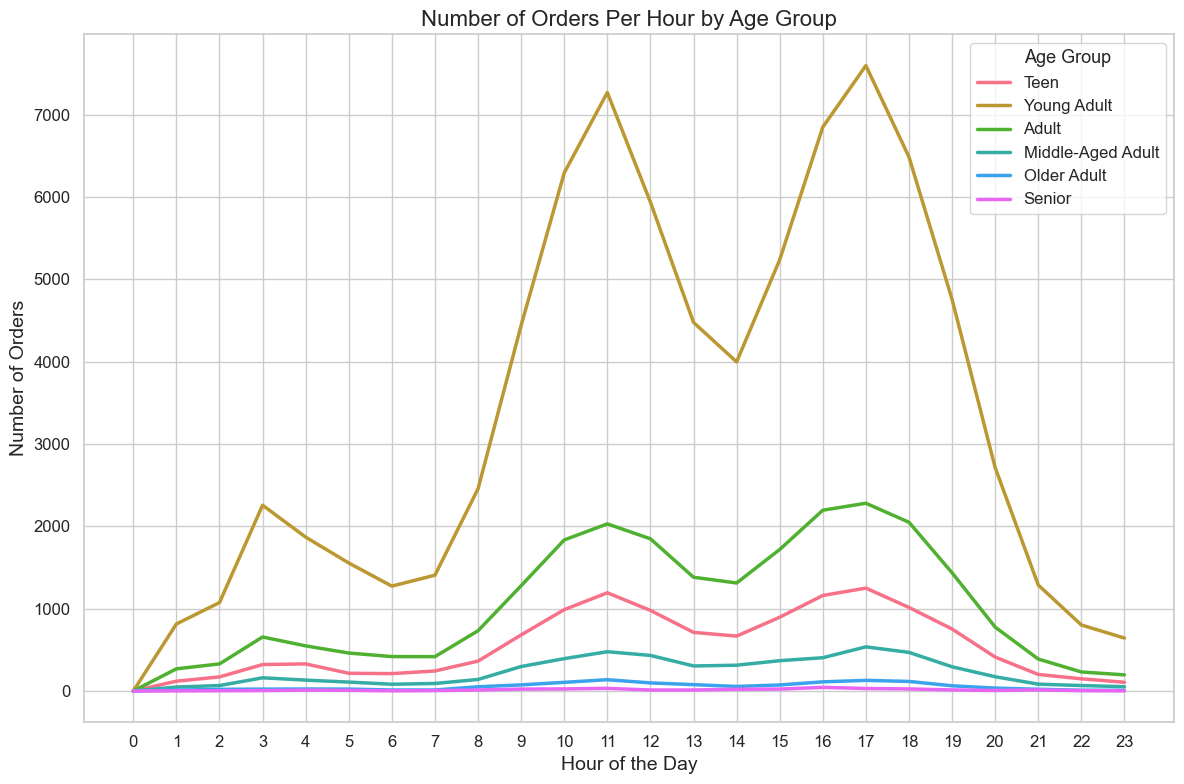

In [70]:
# Now group by both hour and age group
orders_by_hour_age = df_man.groupby(['age_group'])[Hours].sum()


# Create a color palette for the different age groups
palette = sns.color_palette("husl", n_colors=len(orders_by_hour_age.index))

# Plot the data with the improved aesthetics
plt.figure(figsize=(12, 8))
for i, age_group in enumerate(orders_by_hour_age.index):
    plt.plot(Hours, orders_by_hour_age.loc[age_group], label=age_group, color=palette[i], linewidth=2.5)

# Add titles, labels, and style improvements
plt.title('Number of Orders Per Hour by Age Group', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(ticks = Hours, labels = [i for i in range(0,24)] , rotation=0)
plt.legend(title='Age Group', fontsize=12, title_fontsize='13')
plt.grid(True)

# Customize tick size for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

* Young Adults (20-30 years) show the highest spike during typical office hours (12 PM to 2 PM and 6 PM to 7 PM), suggesting they make more frequent purchases during breaks and after work.

* Adults (30-60 years) follow a similar pattern but with a lower volume, indicating that they also align with office hour peaks but may have slightly different schedules.

* Teens and Seniors show much lower overall order activity, with a more even distribution throughout the day, suggesting that these groups may not be as influenced by typical work hours.
This supports the thesis that working-age groups (Young Adults and Adults) tend to order more frequently during office hours, highlighting a strong correlation between labor age and ordering patterns.

* New feature: cuisine_variety

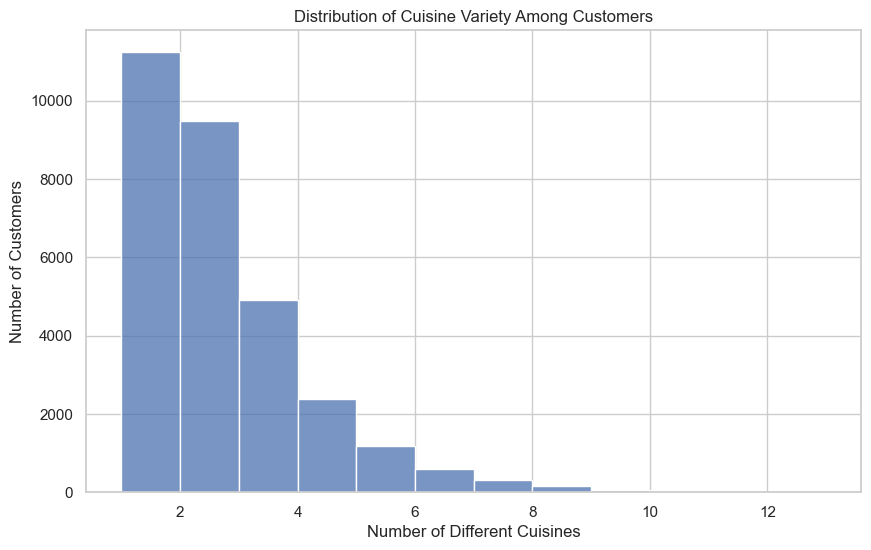

In [71]:
df_man['cuisine_variety'] = df_man[Cuisines].gt(0).sum(axis=1) # it counts how many columns in the subset have values greater than 0 for each row (customer), indicating the variety of cuisines that the customer has ordered from.

plt.figure(figsize=(10, 6))
sns.histplot(df_man['cuisine_variety'], bins=range(1, df_man['cuisine_variety'].max()+2), kde=False)
plt.title('Distribution of Cuisine Variety Among Customers')
plt.xlabel('Number of Different Cuisines')
plt.ylabel('Number of Customers')
plt.show()


Figure 11 - Histogram of number of customers that buy from different cuisines <a class="anchor" id="figure11"></a>

Most customers tend to stick to a narrow variety of cuisines. The majority of customers spend on 1 to 3 different cuisines.
The number of customers significantly decreases as the variety of cuisines they spend on increases.
Very few customers diversify their spending across 6 or more cuisines, with a sharp drop-off in the number of customers as we move beyond 4 different cuisines.


* Vendor Variety vs. Spending:


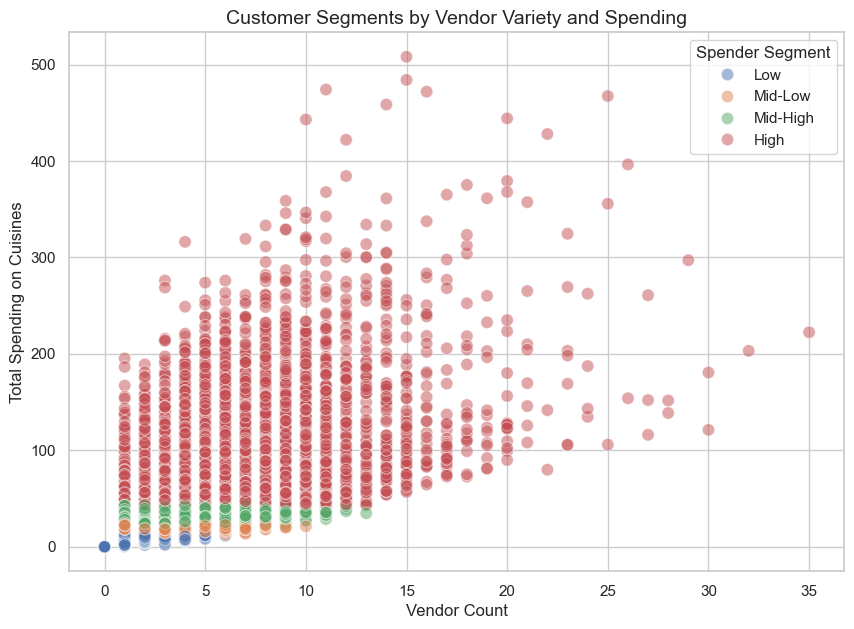

In [72]:
# Scatter plot with trend lines by spender segment
plt.figure(figsize=(10, 7))

# Scatter plot with different colors for each segment
sns.scatterplot(x='vendor_count', y='total_spent_on_cuisines', hue='Spender_Segment', data=df_man, s=80, alpha=0.5)



# Add labels and title
plt.title("Customer Segments by Vendor Variety and Spending", fontsize=14)
plt.xlabel("Vendor Count", fontsize=12)
plt.ylabel("Total Spending on Cuisines", fontsize=12)

# Adjust the legend
plt.legend(title='Spender Segment')
plt.show()


While high spenders tend to explore more vendors, there doesn’t seem to be to much of a relationship between the number of different vendors and the spending totals.

This kind of analysis could inform strategies to encourage greater spending by leveraging promotions or incentives for exploring new vendors while maintaining or increasing spend levels.

* Correlation analysis

Since our variables (total spending, vendor count, cuisine variety, and order range) are continuous and there might not be a linear relationship, we are going to use the Spearman correlation techniques.

In [73]:
spearman_correlation_matrix_1 = df_man[['total_spent_on_cuisines', 'vendor_count', 'cuisine_variety', 'order_range']].corr(method='spearman')


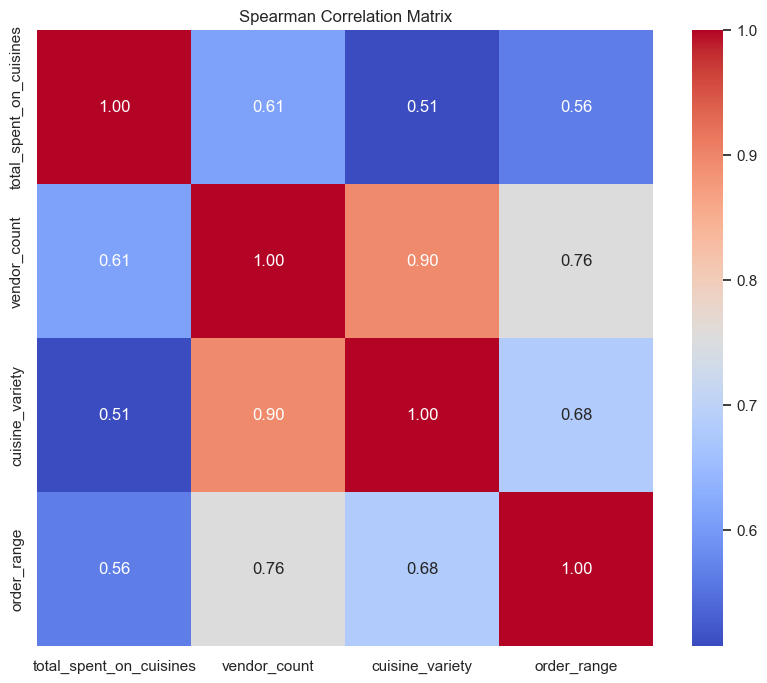

In [74]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix_1, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Spearman Correlation Matrix")
plt.show()

Figure 12 - Correlation matrix between total_spent_on_cuisines, vendor_count, cuisine_variety and order_range <a class="anchor" id="figure12"></a>

Total Spending on Cuisines and Vendor Count (0.61): Moderate positive correlation. More vendors generally lead to higher spending on cuisines.

Total Spending on Cuisines and Cuisine Variety (0.51): Moderate positive correlation. Customers who spend more tend to explore a wider variety of cuisines.

Total Spending on Cuisines and Order Recency (0.56): Moderate positive correlation. Higher spending is associated with greater order ranges.

Vendor Count and Cuisine Variety (0.90): Strong positive correlation. Customers who order from many vendors often try various cuisines. # redundant

Vendor Count and Order Range (0.76): Strong positive correlation. Frequent orders from multiple vendors are linked to a greater range of days between orders.

Cuisine Variety and Order Range (0.68): Moderate to strong positive correlation. Customers who try different cuisines tend to have a greater range of days between orders.

In [75]:
spearman_correlation_matrix_2 = df_man[['total_spent_on_cuisines', 'vendor_count', 'cuisine_variety', 'order_range', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].corr(method='spearman')


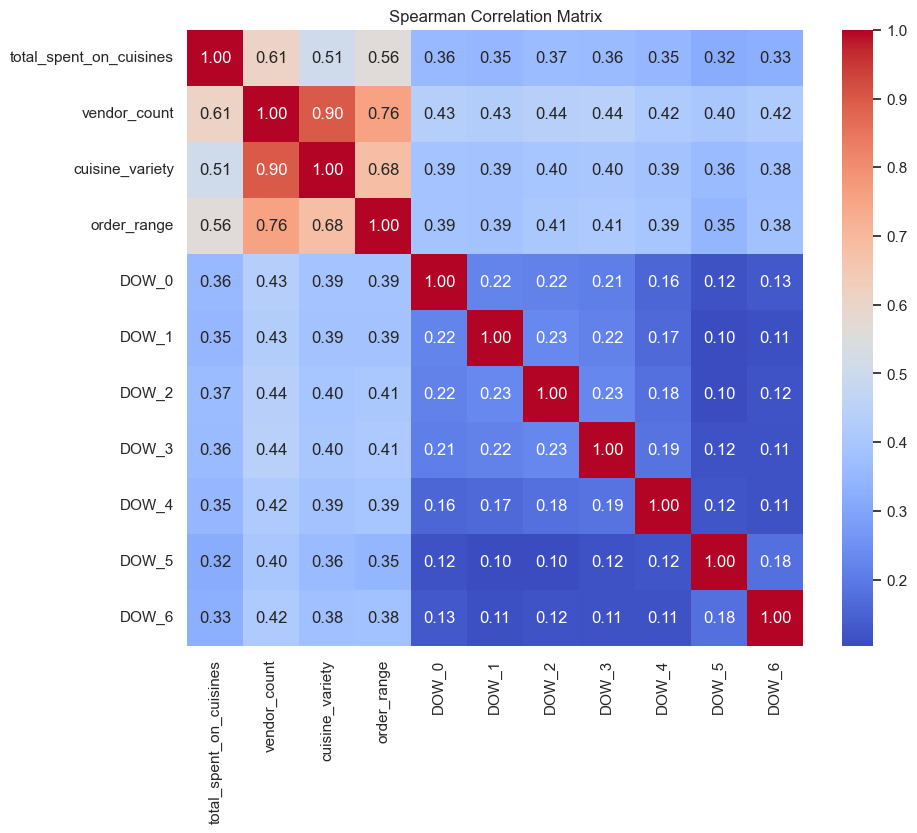

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Spearman Correlation Matrix")
plt.show()

In [77]:
spearman_correlation_matrix_3 = df_man[['customer_age',
 'vendor_count',
 'product_count',
 'is_chain',
 'first_order',
 'last_order', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].corr(method='spearman')


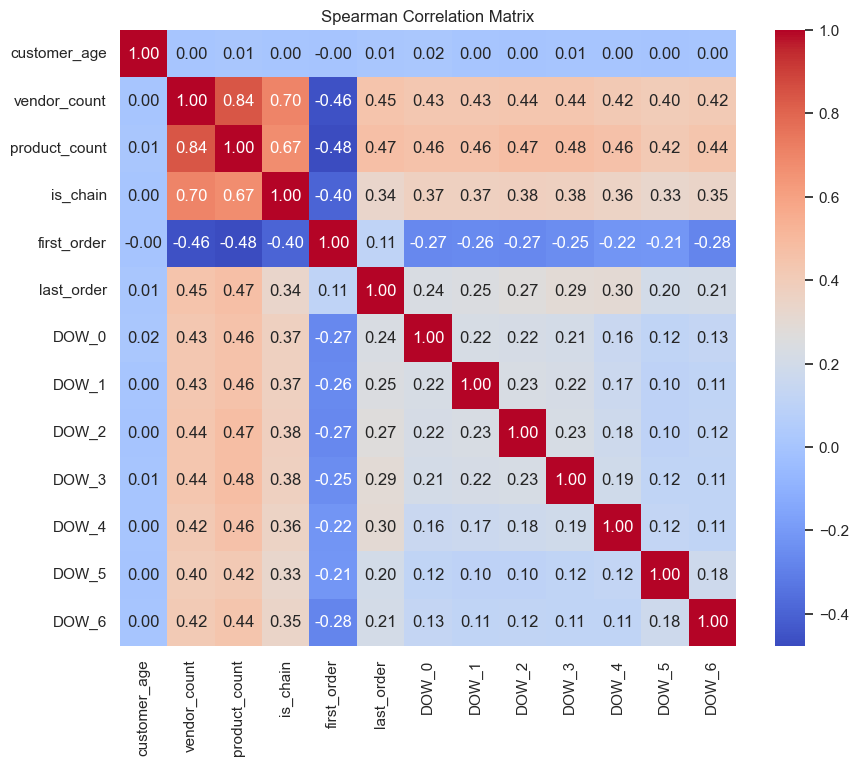

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix_3, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Spearman Correlation Matrix")
plt.show()

In [79]:
spearman_correlation_matrix_4 = df_man[['total_spent_on_cuisines', 'vendor_count', 'cuisine_variety', 'order_range','customer_age',
 'vendor_count',
 'product_count',
 'is_chain'
]].corr(method='spearman')


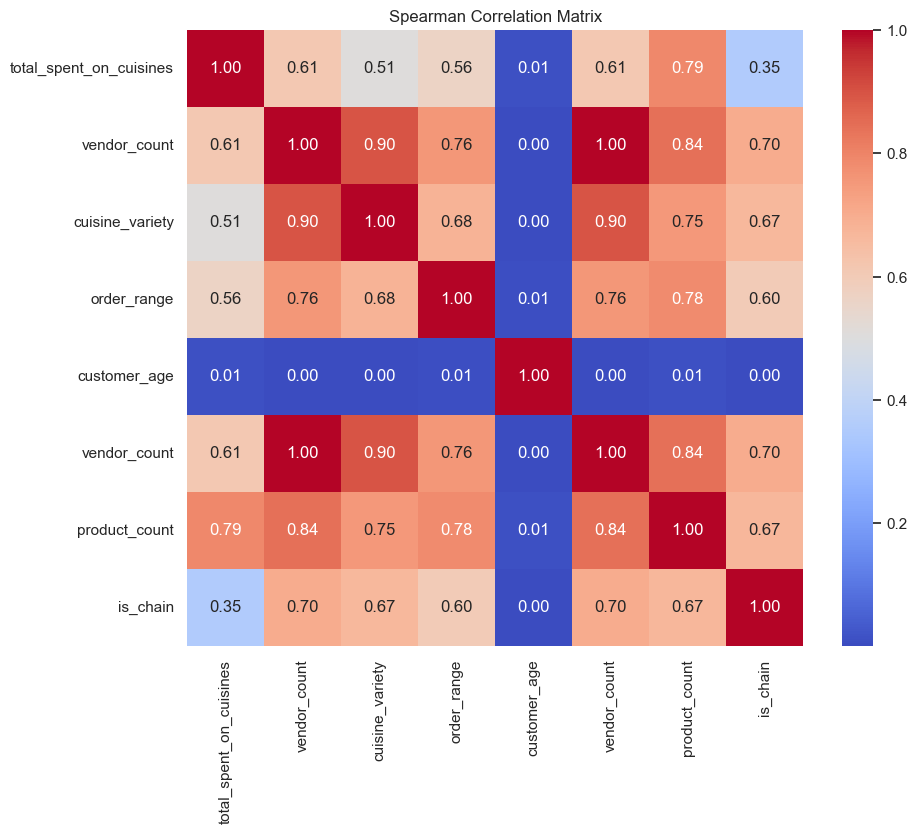

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix_4, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Spearman Correlation Matrix")
plt.show()

# Categorical Variables Analysis

Null Hypothesis: The two categorical variables are independent (i.e., changes in one variable do not affect the other).

Alternative hypothesis: The two categorical variables are not independent (i.e., there is an association between the two variables)

In [81]:

# Assuming df_man is your DataFrame

# Test between customer_region and last_promo
contingency_table_region_promo = pd.crosstab(df_man['customer_region'], df_man['last_promo'])
chi2_stat_region_promo, p_value_region_promo, dof_region_promo, expected_region_promo = stats.chi2_contingency(contingency_table_region_promo)

print("Chi-Squared Test between customer_region and last_promo:")
print(f"Chi-Squared Statistic: {chi2_stat_region_promo}")
print(f"P-Value: {p_value_region_promo}")
print(f"Degrees of Freedom: {dof_region_promo}")
print("Expected Frequencies:")
print(expected_region_promo)
print("\n")

# Test between customer_region and payment_method
contingency_table_region_payment = pd.crosstab(df_man['customer_region'], df_man['payment_method'])
chi2_stat_region_payment, p_value_region_payment, dof_region_payment, expected_region_payment = stats.chi2_contingency(contingency_table_region_payment)

print("Chi-Squared Test between customer_region and payment_method:")
print(f"Chi-Squared Statistic: {chi2_stat_region_payment}")
print(f"P-Value: {p_value_region_payment}")
print(f"Degrees of Freedom: {dof_region_payment}")
print("Expected Frequencies:")
print(expected_region_payment)
print("\n")

# Test between last_promo and payment_method
contingency_table_promo_payment = pd.crosstab(df_man['last_promo'], df_man['payment_method'])
chi2_stat_promo_payment, p_value_promo_payment, dof_promo_payment, expected_promo_payment = stats.chi2_contingency(contingency_table_promo_payment)

print("Chi-Squared Test between last_promo and payment_method:")
print(f"Chi-Squared Statistic: {chi2_stat_promo_payment}")
print(f"P-Value: {p_value_promo_payment}")
print(f"Degrees of Freedom: {dof_promo_payment}")
print("Expected Frequencies:")
print(expected_promo_payment)


Chi-Squared Test between customer_region and last_promo:
Chi-Squared Statistic: 322.297923022048
P-Value: 5.281270926942067e-54
Degrees of Freedom: 24
Expected Frequencies:
[[2.11152597e+02 8.04447652e+01 5.72087011e+01 5.51939368e+01]
 [4.40754913e+03 1.67918491e+03 1.19416083e+03 1.15210512e+03]
 [7.49487188e+02 2.85539092e+02 2.03062568e+02 1.95911152e+02]
 [2.21083041e+02 8.42280587e+01 5.98992093e+01 5.77896913e+01]
 [4.32235638e+02 1.64672824e+02 1.17107910e+02 1.12983628e+02]
 [4.89989009e+03 1.86675662e+03 1.32755340e+03 1.28079990e+03]
 [2.43034548e+02 9.25911283e+01 6.58466485e+01 6.35276748e+01]
 [6.27185931e+00 2.38944847e+00 1.69926835e+00 1.63942387e+00]
 [4.75929591e+03 1.81319315e+03 1.28946147e+03 1.24404948e+03]]


Chi-Squared Test between customer_region and payment_method:
Chi-Squared Statistic: 168.44577099894755
P-Value: 1.7188351792456292e-27
Degrees of Freedom: 16
Expected Frequencies:
[[2.54297713e+02 7.19880574e+01 7.77142295e+01]
 [5.30815004e+03 1.50266160e+

In [82]:
print("Reject H0, which states that customer region and last promo are independent, so they are dependent")
print("Reject H0, which states that customer region and payment method are independent, so they are dependent")
print("Reject H0, which states that last promo and  payment method are indepent,so they are dependent")

Reject H0, which states that customer region and last promo are independent, so they are dependent
Reject H0, which states that customer region and payment method are independent, so they are dependent
Reject H0, which states that last promo and  payment method are indepent,so they are dependent


In [83]:
# Cross-tabulation between customer_region and last_promo
region_promo_crosstab = pd.crosstab(df_man['customer_region'], df_man['last_promo'])


# Cross-tabulation between last_promo and payment_method
promo_payment_crosstab = pd.crosstab(df_man['last_promo'], df_man['payment_method'])


# Cross-tabulation between customer_region and payment_method
region_payment_crosstab = pd.crosstab(df_man['customer_region'], df_man['payment_method'])


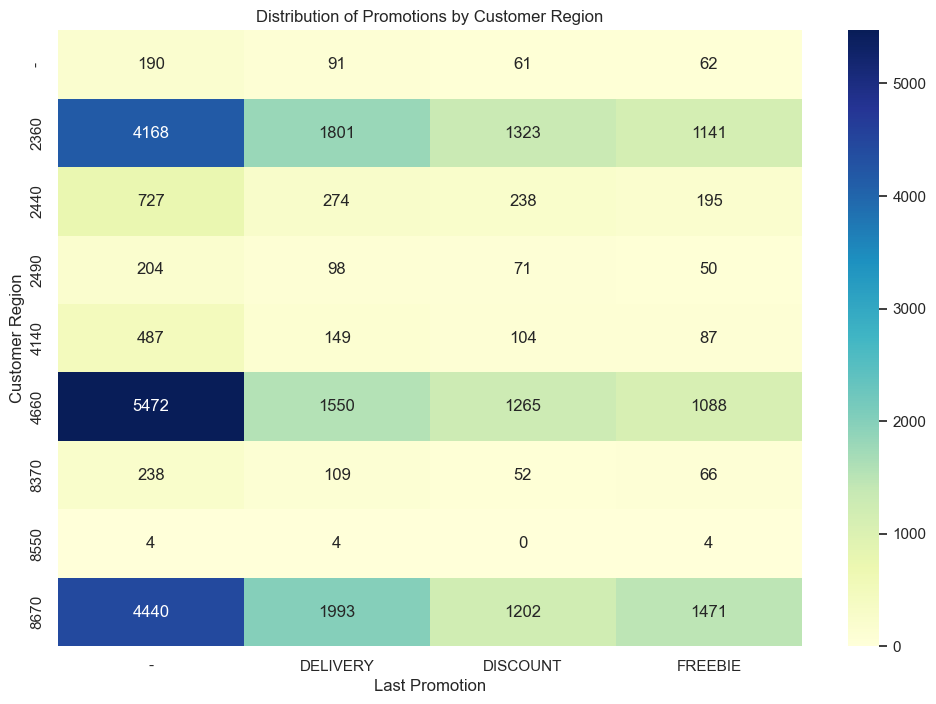

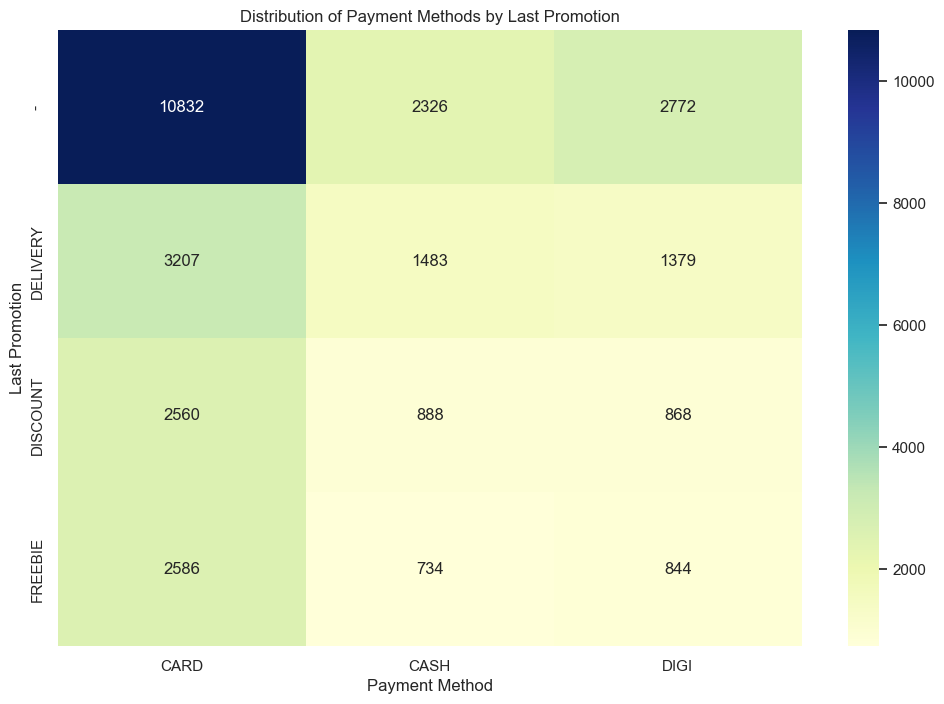

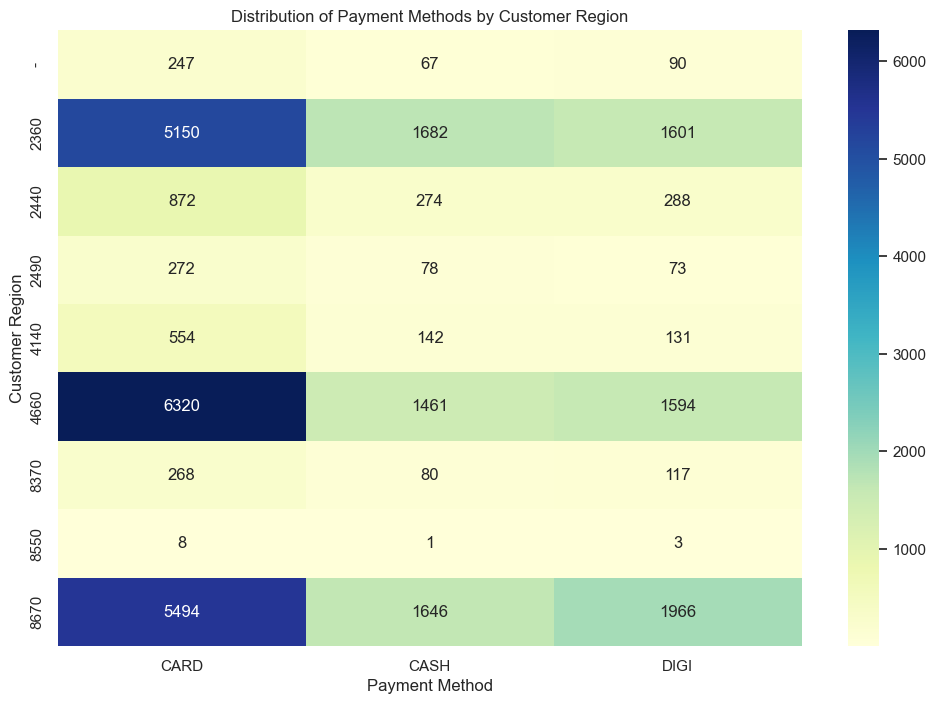

In [84]:
# Heatmap for customer_region vs last_promo
plt.figure(figsize=(12, 8))
sns.heatmap(region_promo_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of Promotions by Customer Region')
plt.xlabel('Last Promotion')
plt.ylabel('Customer Region')
plt.show()

# Heatmap for last_promo vs payment_method
plt.figure(figsize=(12, 8))
sns.heatmap(promo_payment_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of Payment Methods by Last Promotion')
plt.xlabel('Payment Method')
plt.ylabel('Last Promotion')
plt.show()

# Heatmap for customer_region vs payment_method
plt.figure(figsize=(12, 8))
sns.heatmap(region_payment_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of Payment Methods by Customer Region')
plt.xlabel('Payment Method')
plt.ylabel('Customer Region')
plt.show()

Figure 13 (middle plot) - Crosstable between Last Promotion and Payment Method <a class="anchor" id="figure13"></a>

* Distribution of Promotions by Customer Region

* Overall Trends: Certain customer regions show a clear preference for specific types of promotions.

* Observations:

Region 4606 has the highest number of customers utilizing Discount and Freebie promotions, indicating a potential attractiveness of these promotions in that region.

Regions 2360 and 8670 also show substantial engagement with promotions but have lower counts compared to region 4606.

Regions 8370 and 8550 have low counts for all types of promotions, suggesting that customers in these regions may be less responsive to promotional offers.

* Overall Trends: The heatmap shows how different payment methods correspond to various last promotions.

* Observations:

Customers who received a Freebie promotion predominantly used CARD payment, followed by CASH and DIGI.

Discount promotions are also popular, with a notable number of transactions made via CARD.

The DELIVERY option also has a large number of transactions, indicating that delivery promotions are effective in encouraging purchases.

* Overall Trends: This heatmap illustrates how payment methods vary across different customer regions.

* Observations:

Region 4606 has a substantial amount of CARD payments, indicating a preference for this payment method in that region.

Region 2360 shows a diverse range of payment methods, suggesting flexibility among customers in that area.

Regions 8370 and 8550 have lower numbers across all payment methods, indicating potentially lower purchasing activity or engagement.

### Chi-Squared Test for Spender Segment and Customer Region


In [85]:
# Chi-Squared Test between age_group and Spender_Segment
age_group_spender_crosstab = pd.crosstab(df_man['age_group'], df_man['Spender_Segment'])
chi2_age_spender, p_age_spender, dof_age_spender, expected_age_spender = chi2_contingency(age_group_spender_crosstab)

print("Chi-Squared Test between Age Group and Spender Segment:")
print(f"Chi-Squared Statistic: {chi2_age_spender}")
print(f"P-Value: {p_age_spender}")
print(f"Degrees of Freedom: {dof_age_spender}")
print("Expected Frequencies:")
print(expected_age_spender)

# Chi-Squared Test between customer_region and Spender_Segment
region_spender_crosstab = pd.crosstab(df_man['customer_region'], df_man['Spender_Segment'])
chi2_region_spender, p_region_spender, dof_region_spender, expected_region_spender = chi2_contingency(region_spender_crosstab)

print("\nChi-Squared Test between Customer Region and Spender Segment:")
print(f"Chi-Squared Statistic: {chi2_region_spender}")
print(f"P-Value: {p_region_spender}")
print(f"Degrees of Freedom: {dof_region_spender}")
print("Expected Frequencies:")
print(expected_region_spender)

# Chi-Squared Test between customer_region and age_group
region_age_group_crosstab = pd.crosstab(df_man['customer_region'], df_man['age_group'])
chi2_region_age, p_region_age, dof_region_age, expected_region_age = chi2_contingency(region_age_group_crosstab)

print("\nChi-Squared Test between Customer Region and Age Group:")
print(f"Chi-Squared Statistic: {chi2_region_age}")
print(f"P-Value: {p_region_age}")
print(f"Degrees of Freedom: {dof_region_age}")
print("Expected Frequencies:")
print(expected_region_age)

Chi-Squared Test between Age Group and Spender Segment:
Chi-Squared Statistic: 26.956550015206293
P-Value: 0.029092364872193275
Degrees of Freedom: 15
Expected Frequencies:
[[ 824.08076165  822.13539068  823.          822.78384767]
 [4872.3900197  4860.88798424 4866.         4864.72199606]
 [1503.72209455 1500.17232436 1501.75       1501.35558109]
 [ 332.93663821  332.15068943  332.5         332.41267236]
 [  73.59652003   73.42278398   73.5          73.48069599]
 [  18.27396586   18.23082731   18.25         18.24520683]]

Chi-Squared Test between Customer Region and Spender Segment:
Chi-Squared Statistic: 5684.114176198706
P-Value: 0.0
Degrees of Freedom: 24
Expected Frequencies:
[[ 101.12260901  100.8840185   101.02982381  100.96354867]
 [2110.80931133 2105.82902982 2108.87253519 2107.48912366]
 [ 358.93520129  358.08832311  358.60585977  358.37061583]
 [ 105.87837527  105.62856393  105.78122642  105.71183438]
 [ 207.00098428  206.51258243  206.81105023  206.67538305]
 [2346.59519669

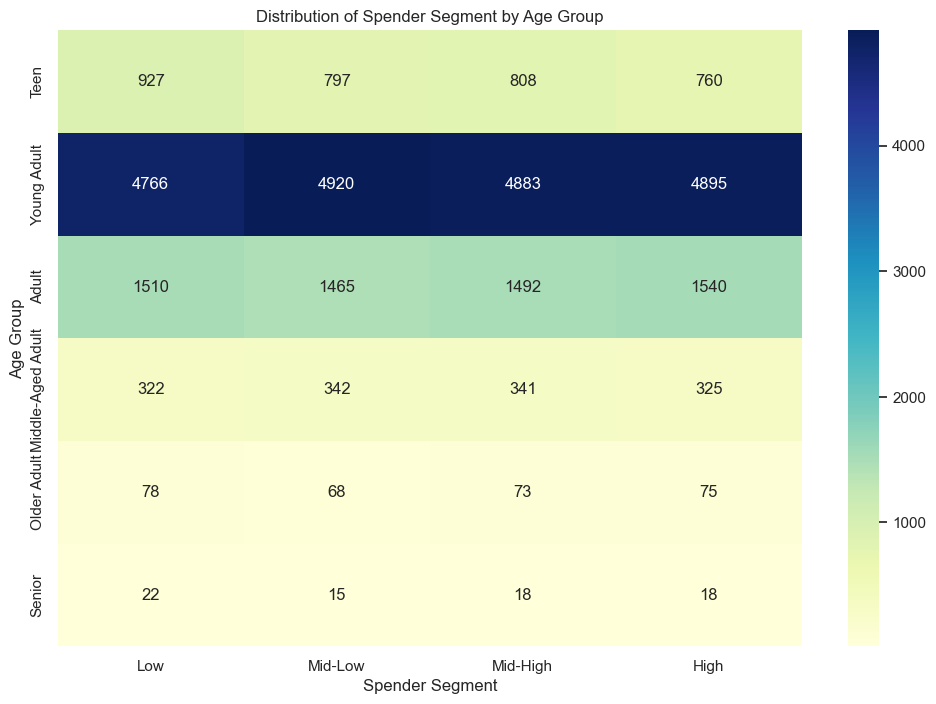

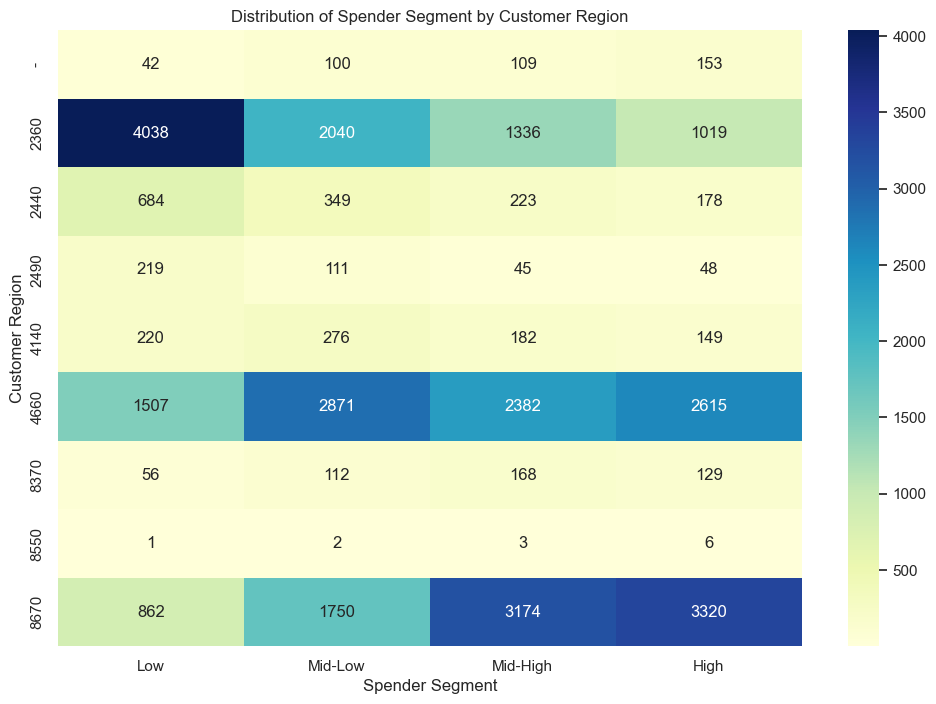

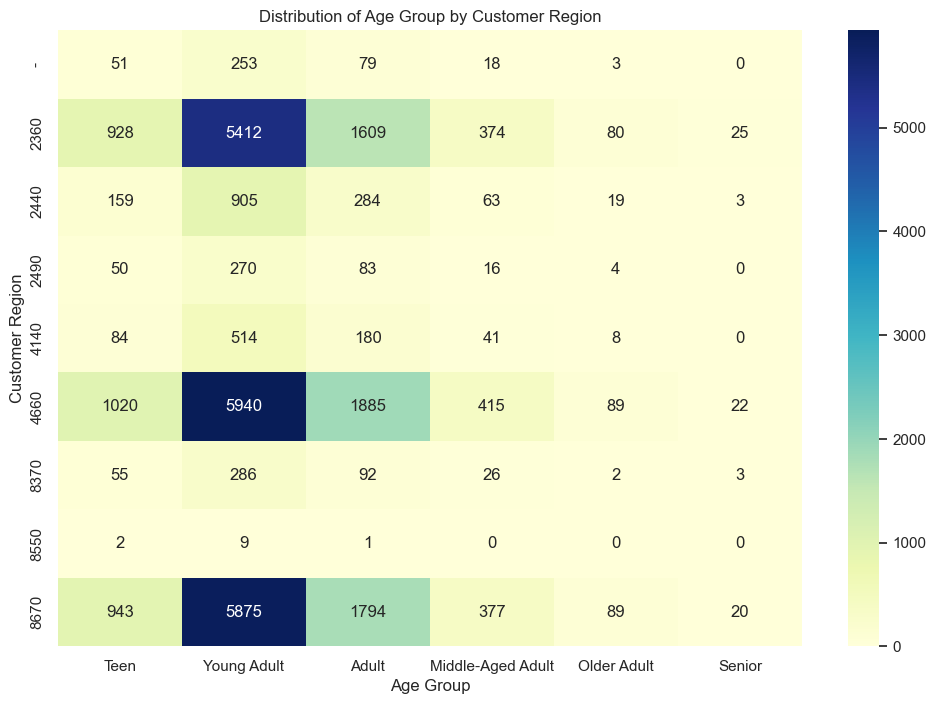

In [86]:
# Cross-tabulation between age_group and Spender_Segment
age_group_spender_crosstab = pd.crosstab(df_man['age_group'], df_man['Spender_Segment'])


# Cross-tabulation between customer_region and Spender_Segment
region_spender_crosstab = pd.crosstab(df_man['customer_region'], df_man['Spender_Segment'])


# Cross-tabulation between customer_region and age_group
region_age_group_crosstab = pd.crosstab(df_man['customer_region'], df_man['age_group'])


# Heatmap for age_group vs Spender_Segment
plt.figure(figsize=(12, 8))
sns.heatmap(age_group_spender_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of Spender Segment by Age Group')
plt.xlabel('Spender Segment')
plt.ylabel('Age Group')
plt.show()

# Heatmap for customer_region vs Spender_Segment
plt.figure(figsize=(12, 8))
sns.heatmap(region_spender_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of Spender Segment by Customer Region')
plt.xlabel('Spender Segment')
plt.ylabel('Customer Region')
plt.show()

# Heatmap for customer_region vs age_group
plt.figure(figsize=(12, 8))
sns.heatmap(region_age_group_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of Age Group by Customer Region')
plt.xlabel('Age Group')
plt.ylabel('Customer Region')
plt.show()

Figure 14 (first plot) - Crosstable between Age Group and Spender Segment <a class="anchor" id="figure14"></a>

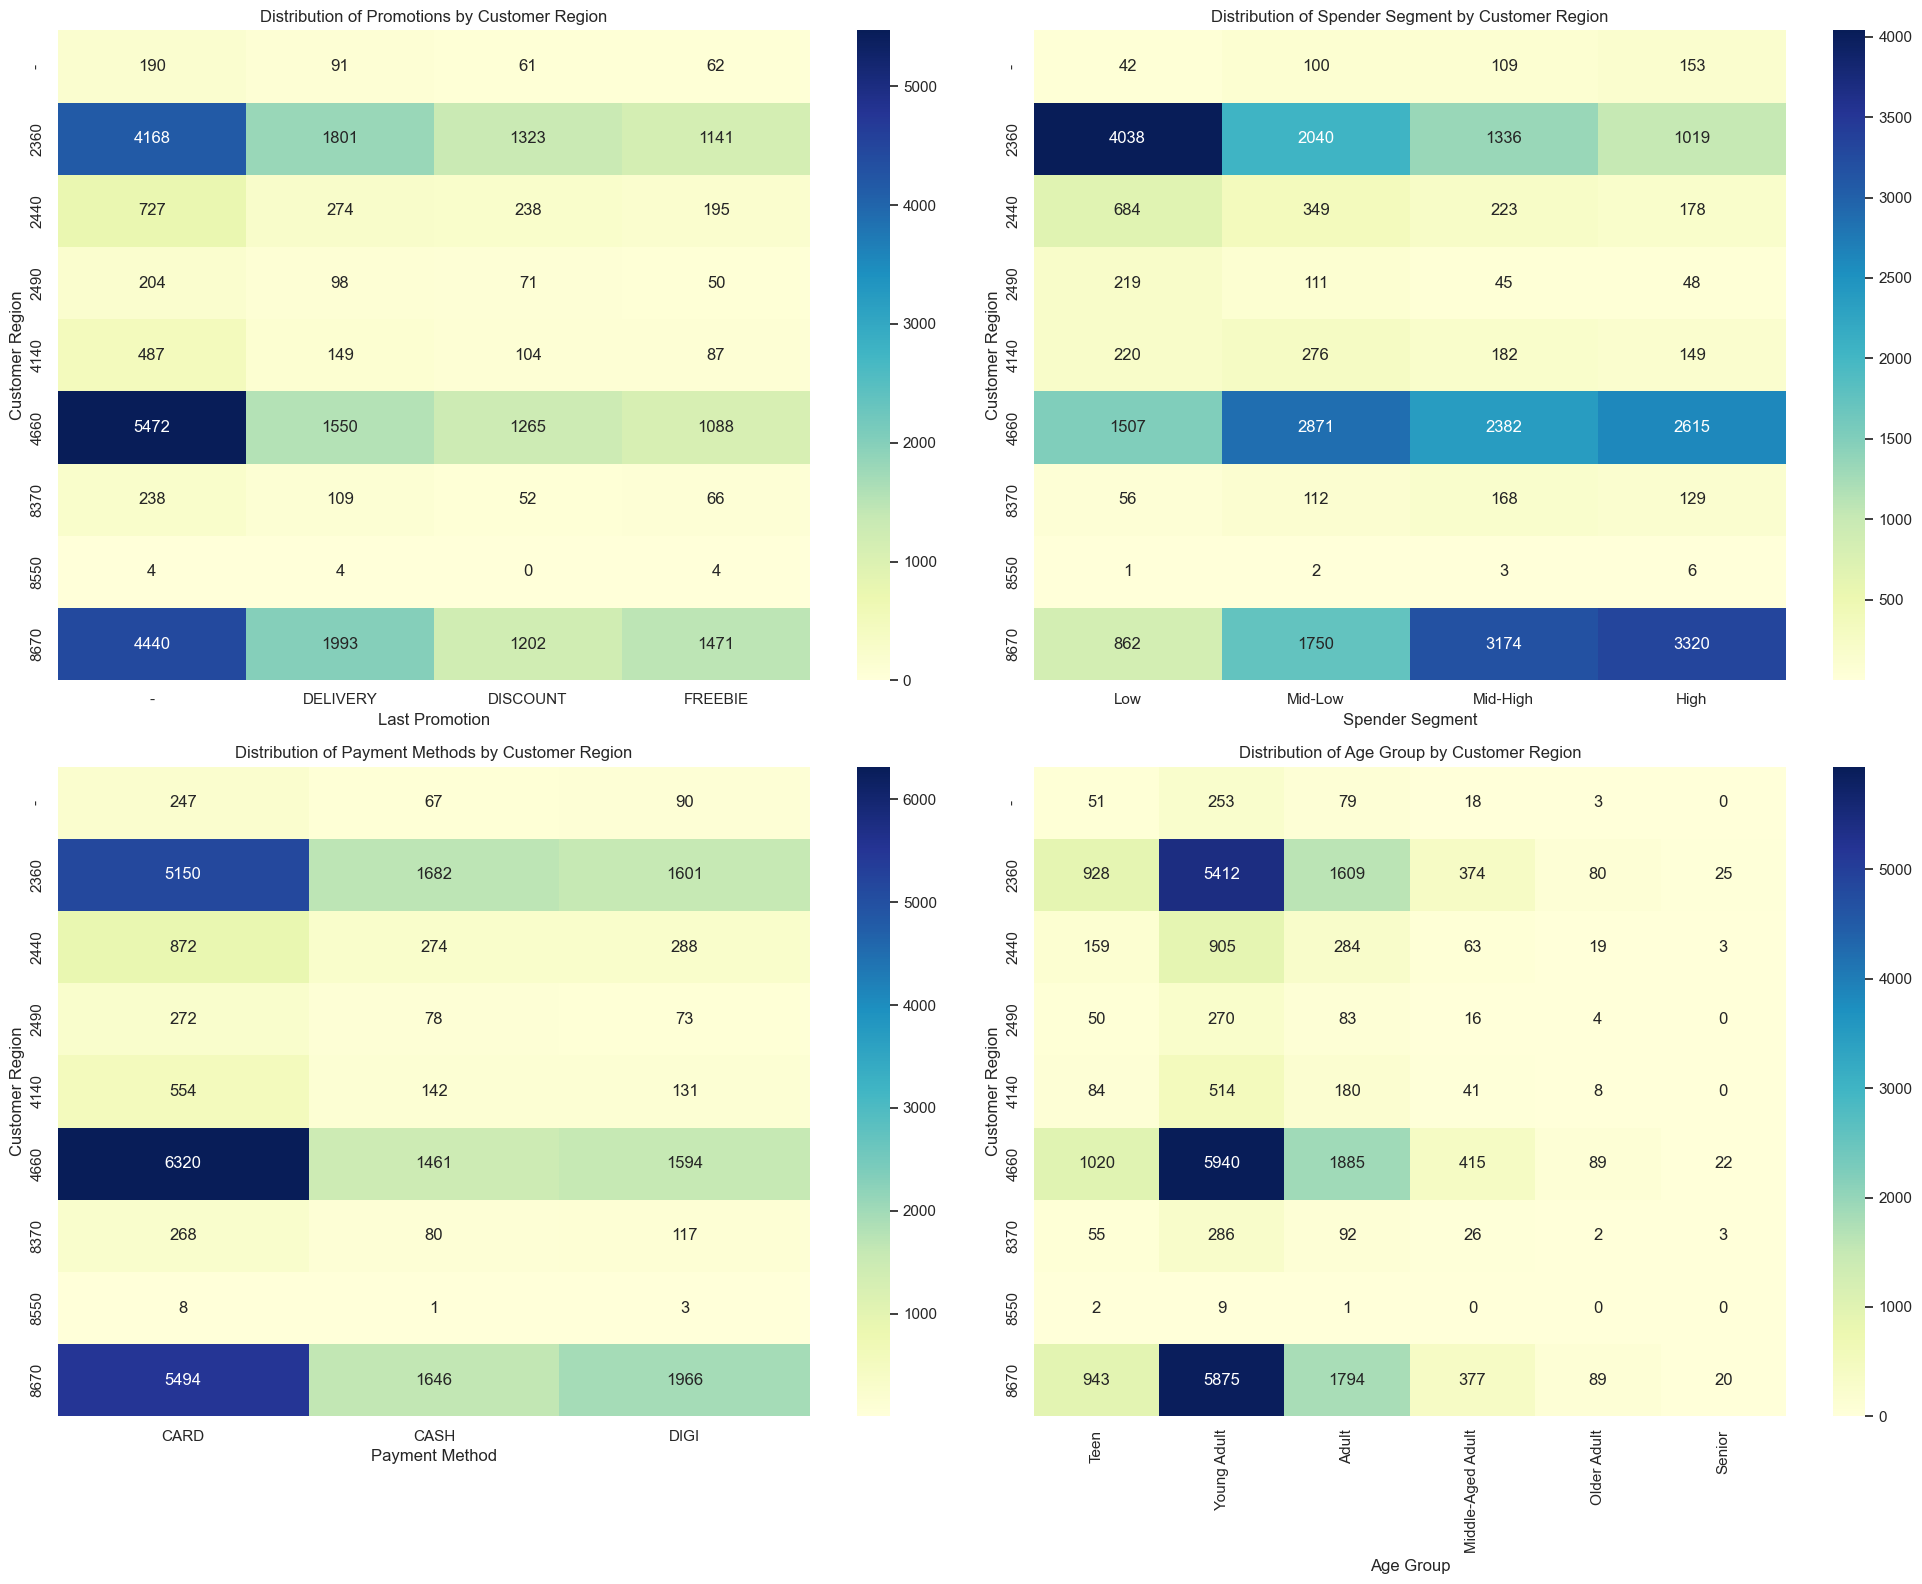

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: customer_region vs last_promo
sns.heatmap(region_promo_crosstab, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Promotions by Customer Region')
axes[0, 0].set_xlabel('Last Promotion')
axes[0, 0].set_ylabel('Customer Region')

# Plot 2: last_promo vs payment_method
sns.heatmap(region_spender_crosstab, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Spender Segment by Customer Region')
axes[0, 1].set_xlabel('Spender Segment')
axes[0, 1].set_ylabel('Customer Region')

# Plot 3: customer_region vs payment_method
sns.heatmap(region_payment_crosstab, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Payment Methods by Customer Region')
axes[1, 0].set_xlabel('Payment Method')
axes[1, 0].set_ylabel('Customer Region')

# Plot 4: customer_region vs age_group
sns.heatmap(region_age_group_crosstab, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Age Group by Customer Region')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Customer Region')

plt.tight_layout()
plt.show()